In [1]:
# Importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

In [2]:
# Loading the data.

df_house = pd.read_csv('Data file.csv')
df_house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
# Shape of the dataset

df_house.shape

(1460, 81)

In [4]:
# Info of the dataset refelcting all the columns names, their datatype and the non-null count.

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The dataset contains 1460 rows and 81 columns including the target variable named 'SalePrice'. The datatypes include int64, float64 and object. 

The data includes both numerical and categorical data, which further have in total 4 types of variables : Nominal, Ordinal, Discrete,
Continuous

In [5]:
# Dropping the column 'ID' as id is unique to all the houses for selling i.e. the data.

df_house.drop('Id', axis = 1, inplace = True)

In [6]:
# Chceking the shape after dropping the 'Id' column.

df_house.shape

(1460, 80)

In [7]:
# Replacing NA with actual value in the dataset for eg. NA in 'FireplaceQu' means No Fireplace. 
# So that the NA won't be counted as null values in the dataset and the data's orginality remains the same.

df_house.FireplaceQu=["No Fireplace" if x is np.nan else x for x in df_house.FireplaceQu]
df_house.BsmtQual=["No Basement" if x is np.nan else x for x in df_house.BsmtQual]
df_house.BsmtCond=["No Basement" if x is np.nan else x for x in df_house.BsmtCond]
df_house.BsmtExposure=["No Basement" if x is np.nan else x for x in df_house.BsmtExposure]
df_house.BsmtFinType1=["No Basement" if x is np.nan else x for x in df_house.BsmtFinType1]
df_house.BsmtFinType2=["No Basement" if x is np.nan else x for x in df_house.BsmtFinType2]
df_house.GarageType=["No Garage" if x is np.nan else x for x in df_house.GarageType]
df_house.GarageFinish=["No Garage" if x is np.nan else x for x in df_house.GarageFinish]
df_house.GarageCond=["No Garage" if x is np.nan else x for x in df_house.GarageCond]
df_house.GarageQual=["No Garage" if x is np.nan else x for x in df_house.GarageQual]
df_house.Alley=["No Alley" if x is np.nan else x for x in df_house.Alley]
df_house.Fence=["No Fence" if x is np.nan else x for x in df_house.Fence]
df_house.MiscFeature=["None" if x is np.nan else x for x in df_house.MiscFeature]
df_house.PoolQC=["No Pool" if x is np.nan else x for x in df_house.PoolQC]

###### CHECKING THE MISSING VALUES

In [8]:
# Let's first check the missing values.
missing_values = df_house.isnull().sum()

# Filtering the missing count columns only
missing_count = missing_values[missing_values > 0]
print(missing_count.sort_values())
print("\n Total columns having missing values : ", len(missing_count))

Electrical       1
MasVnrType       8
MasVnrArea       8
GarageYrBlt     81
LotFrontage    259
dtype: int64

 Total columns having missing values :  5


Thus , there are total 5 columns out of 81 having null values.

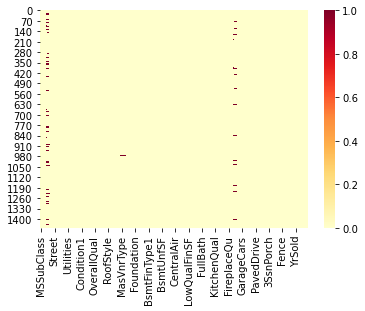

In [9]:
# Visualizing the null values using heatmap.

sns.heatmap(df_house.isnull(), cmap = 'YlOrRd')
plt.show()

###### HANDLING MISSING VALUES

In [10]:
# Replacing the null values with their respective mode.

df_house.Electrical = df_house.Electrical.fillna(df_house['Electrical'].mode()[0])
df_house.MasVnrType = df_house.MasVnrType.fillna(df_house['MasVnrType'].mode()[0])

In [11]:
# Filling the null values with the median of the variables - 'LotFrontage' and 'MasVnrArea' respectively.

df_house['LotFrontage'] = df_house['LotFrontage'].fillna(df_house['LotFrontage'].median())
df_house['MasVnrArea'] = df_house['MasVnrArea'].fillna(df_house['MasVnrArea'].median())

In [12]:
# Replacing the null values in 'GarageYrBlt' with the actual values of 'YearBuilt' in the vaialble cases respectively.

df_house['GarageYrBlt'] = df_house['GarageYrBlt'].fillna(df_house['YearBuilt'])

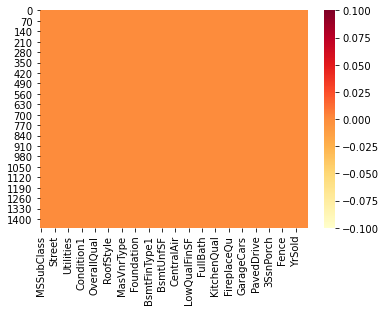

In [13]:
# Visualizing the null values using heatmap after filling the same.

sns.heatmap(df_house.isnull(), cmap = 'YlOrRd')
plt.show()

###### STATISTICAL SUMMARY

In [14]:
# Let's check the  statistical summary of the dataset.

df_house.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315   
std      30.202904     20.645407   180.731373   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014  1976.507534   
std        0.815778      0.220338      1.625393     0.644666    26.306739   
min        0.000000      0.000000      2.000000     0.000000  1872.000000   
25%        2.000000      1.000000      5.000000     0.000000  1959.000000   
50%        3.000000      1.000000      6.000000     1.000000  1978.000000   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

###### CORRELATION

<AxesSubplot:>

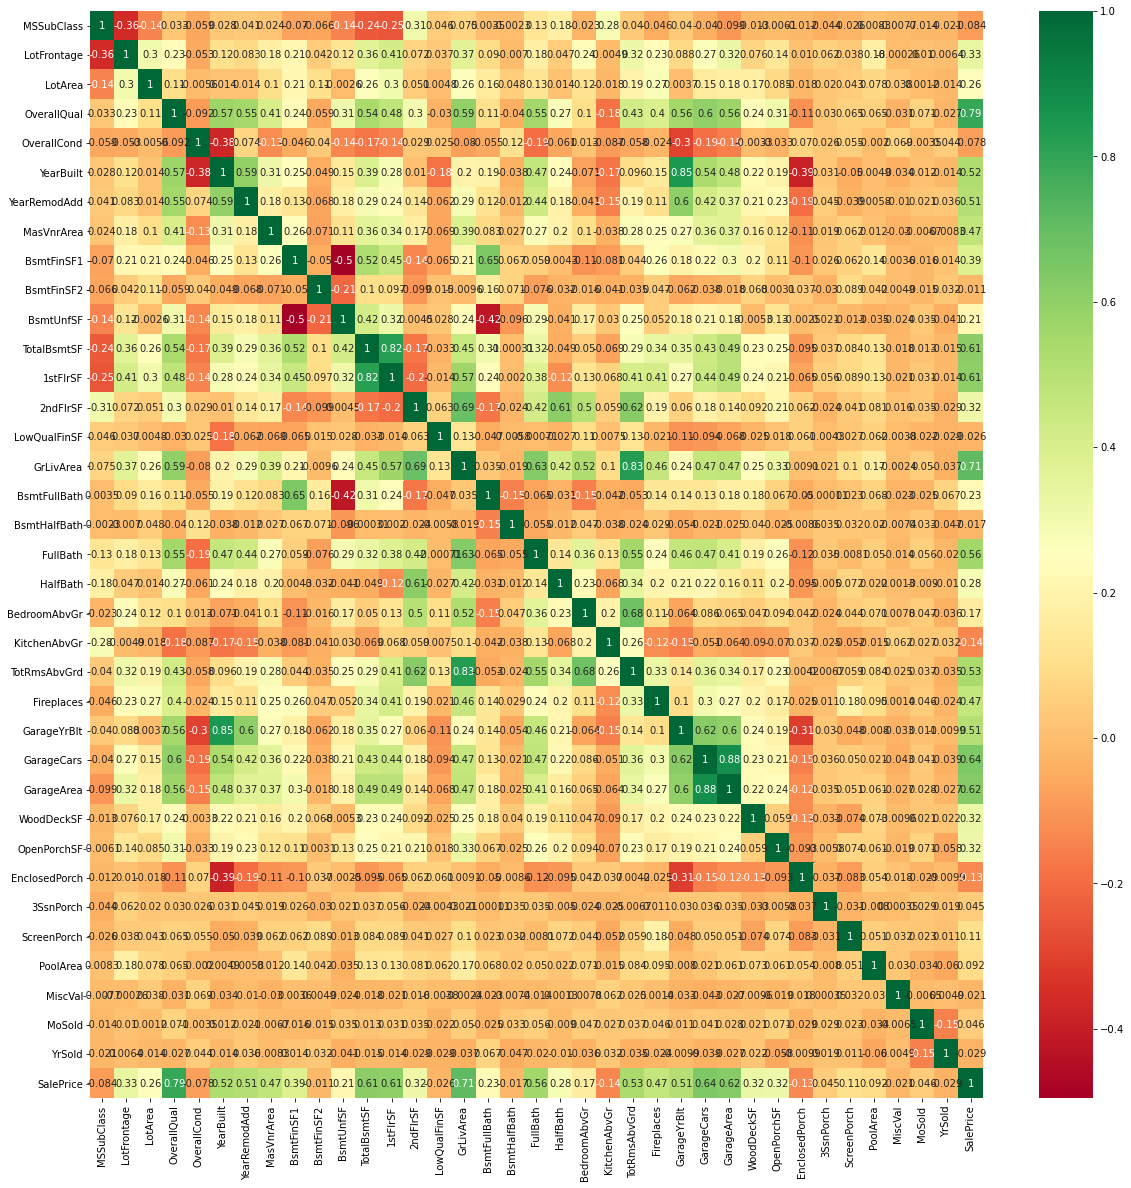

In [15]:
# Let's check the correlation among attributes using heatmap.

plt.figure(figsize=(20,20))
sns.heatmap(df_house.corr(), cmap='RdYlGn', annot=True)

OBSERVATIONS:

1. The strongest positive correlation is between – ‘GarageCars’ and ‘GarageArea’, ‘GrLivArea’ and ‘TotRmsAbvGrd’, ‘YearBuilt’ and ‘GarageYrBuilt’, & ‘TotalBsmtSF’ and '1stFlrSF.

  2.The strongest negative correlation is between – ‘BsmtUnfSF’ and ‘BsmtFinSF1’, ‘BsmtUnfSF’ and ‘BsmtFullBath’.

3.BsmtFinType2 is high multicolinearity with BsmtFinSF2 but less related with SalePrice.

4.MasVnrType is high multicolinearity with MasVnrArea but less related with SalePrice.

5.2ndFloorSF is GrLivArea are having high multicolinearity but less with SalePrice.

6.‘OverallCond’ is highly positively correlated with the target variable.

7.Overall the correlation of the target variable with other independent features is neutral.

In [15]:
# Checked the correlation of the independent variables in relation with the target variable.

corr_list = df_house.corr()['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
GarageYrBlt      0.508043
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

###### VISUALIZING AND UNDERSTANDING THE DATA (UNI-VARIATE AND BI-VARIATE ANALYSIS)

###### Target Variable

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

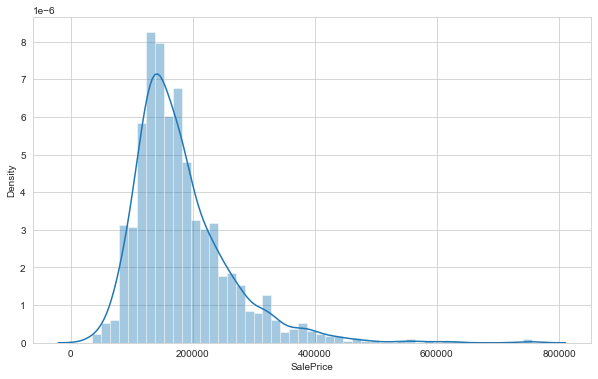

In [16]:
# Visualizing the distribution of target variable.

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.distplot(df_house['SalePrice'])

The target variable is rightly skewed which needs to be normalised for the model. This distribution plot depicts that the majority of the data is having the lowerd priced house.

###### Numerical Variables

In [17]:
# Let's find the numerical features in the dataset.

num_features = df_house.select_dtypes(include = [np.number])
print(num_features.columns)
print("\n Total numerical features : ", len(num_features.columns), '\n')
num_features.head()

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

 Total numerical features :  37 



MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

There are total 37 numerical features in the dataset including both discrete and continous type of variables.

Here, out of the all numerical features obtained, there are 4 datetime variables, named: 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt' and 'YrSold'.

###### Temporal Variables

In [18]:
# Creating a list of the datetime type variables.

year_features = df_house[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']]

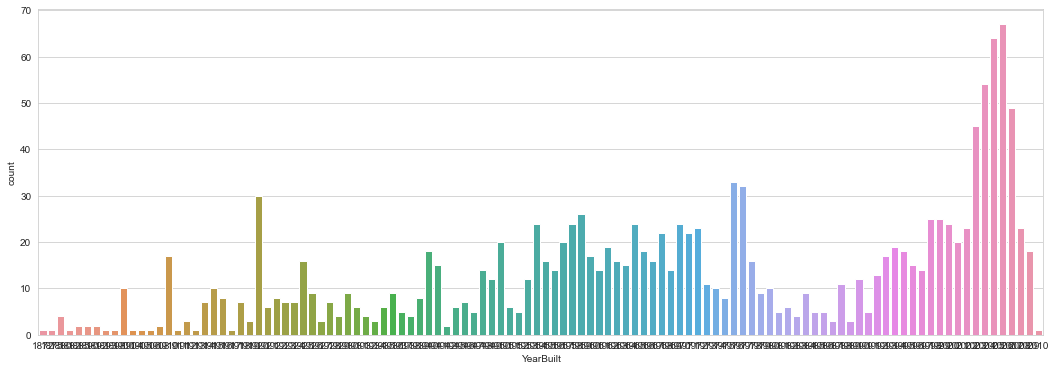

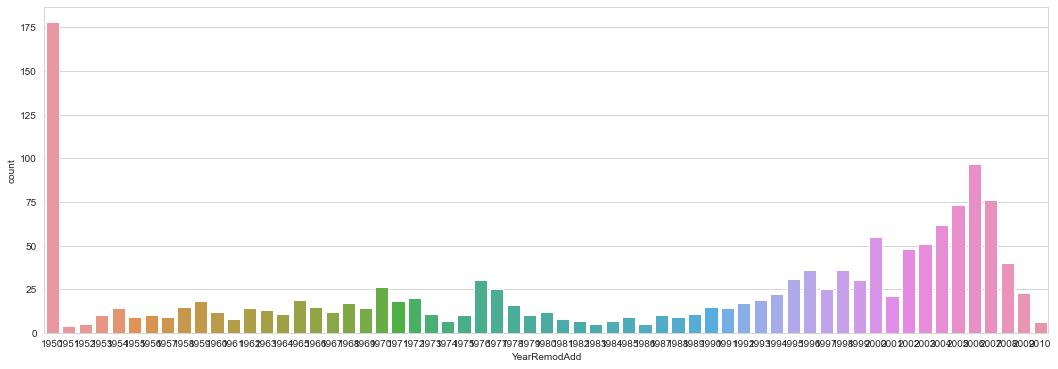

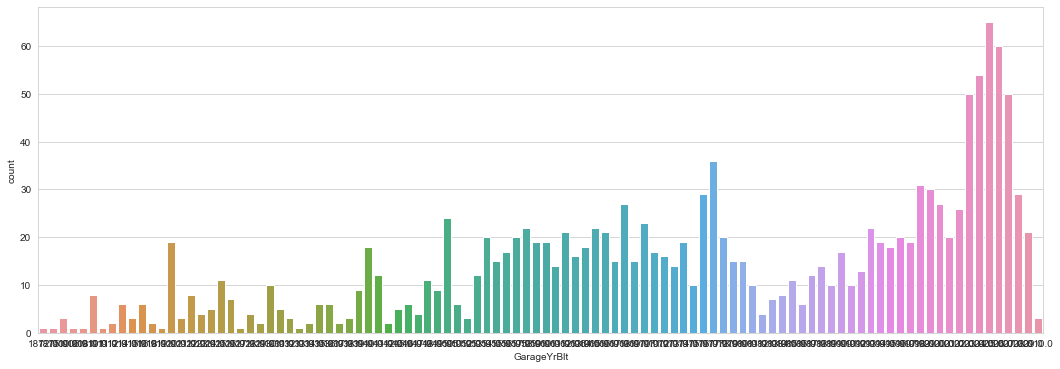

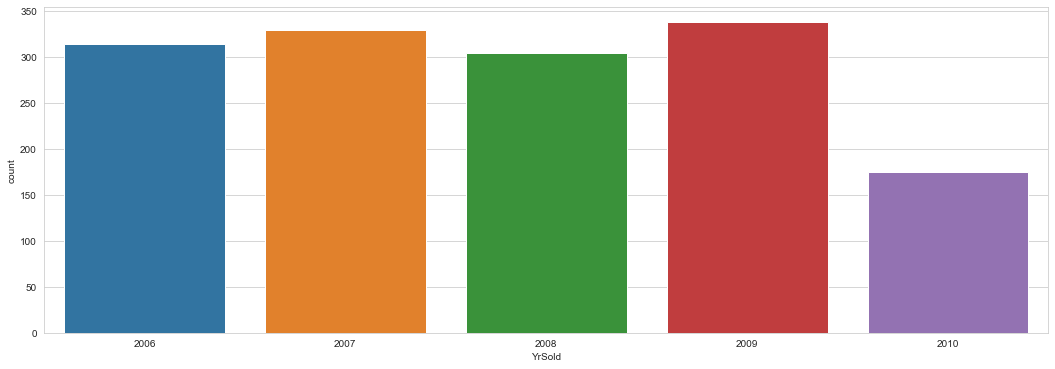

In [22]:
# Visualizing the temporal variables.

for year in year_features:
    plt.figure(figsize= (18,6))
    x = sns.countplot(year_features[year], data = df_house)
    plt.show()

OBSERVATIONS :

1. 'YearBuilt' – The maximum number of houses were built in the year – with the count of 65 houses. During the period the count of house built is high as compared to other year to which the houses were built.

2. 'YearRemodAdd' – About count of 175+ houses were re-modified in the year 1950.

3. 'GarageYrBlt' – The year to which garage was built is same to that of the year to which the house was built.

4. 'YrSold' – This attribute depicts the year to which the house was sold. The graph represents that the maximum count of houses were sold in the year 2009 followed by year 2007. The least count of houses sold were in the year 2010.

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

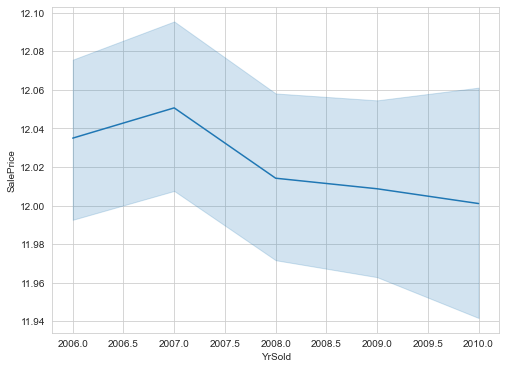

In [23]:
# Visualizing the relation between the target variable i.e. SalePrice of the house and the YrSold - year in which the house was sold.

plt.figure(figsize=(8,6))
sns.lineplot(x = 'YrSold', y = 'SalePrice', data = df_house)

The above graph shows that with the increase in year the sale price of the house is descreasing. So, there is an inverse propotionality between the sale price of the house and the year to which the house was sold. 

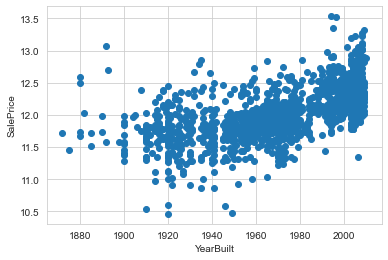

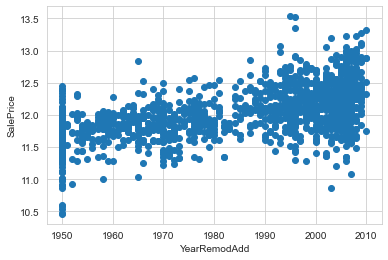

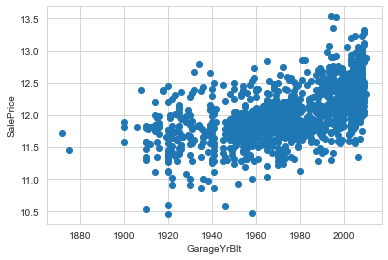

In [24]:
# Now Let's compare all the other datetime features with the target variable.
for feature in year_features:
    if feature!= 'YrSold':
        plt.scatter(df_house[feature], df_house['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

From the above all the 3 graphs, there is a direct relationship seen between the respective three variables with the target variable. Observations:

1. The max. number of houses are built in year 2000 and above, which also reflects the slight increase in the sale price of the house as compared to the sale price of the houses built in years 1880 and more.

2. Similarly, there is a silghtly increase in the sale price of the year with the increase in the year for the house remodification. The average being 300000 the sale price. The highest number of house remodification can be seen between the year 2004 - 2010.

3. The sale price also increases with the increase in the year of the garage being built. From yea 1920 - 1960 the sale priceis somewha constant but then it starts to increase slightly with the incraese in year.

###### Discrete Variables

In [19]:
# Creating a list of the discrrete type variables.

dis_features = df_house[[feature for feature in num_features if len(df_house[feature].unique()) < 25 and 
                         feature not in year_features]]
print('Total Discrete Variables:', len(dis_features.columns), '\n')
dis_features.head(2)

Total Discrete Variables: 17 



MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5

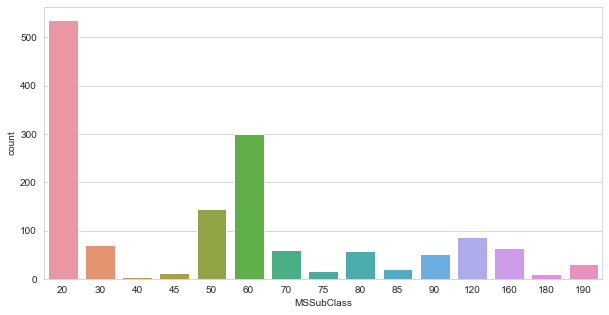

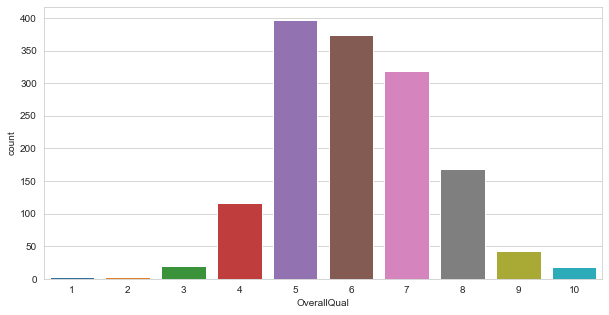

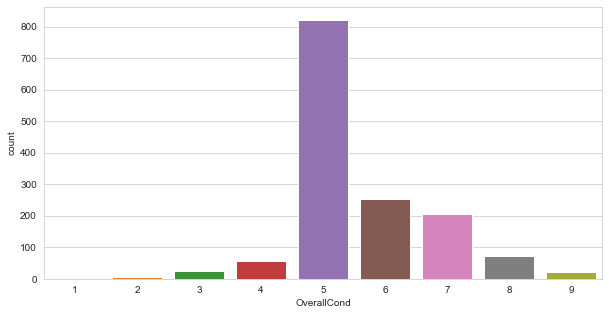

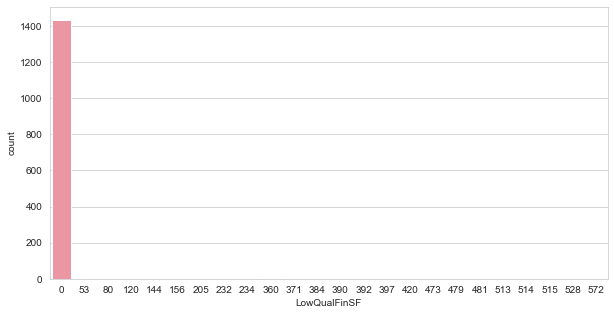

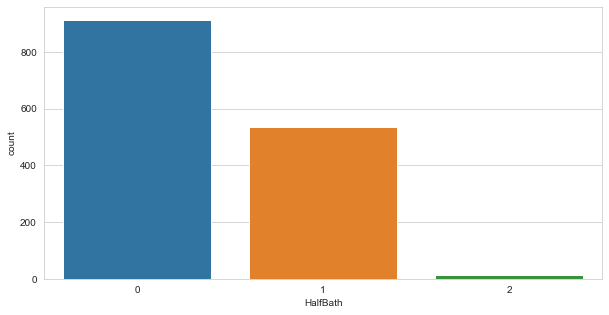

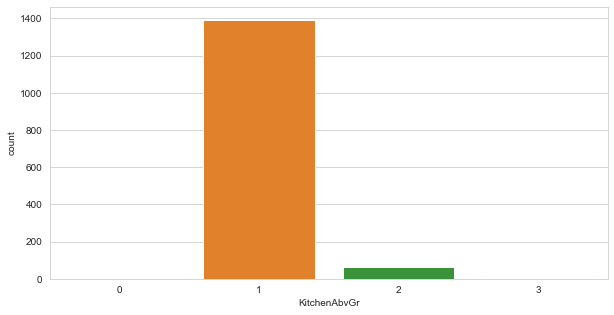

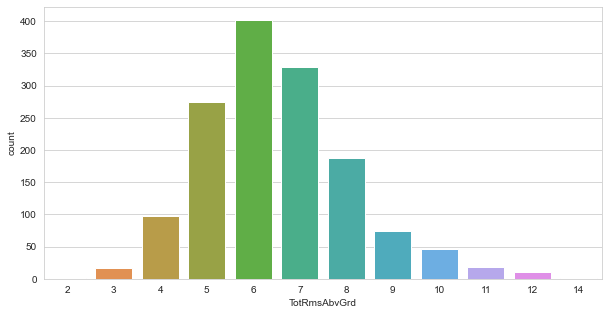

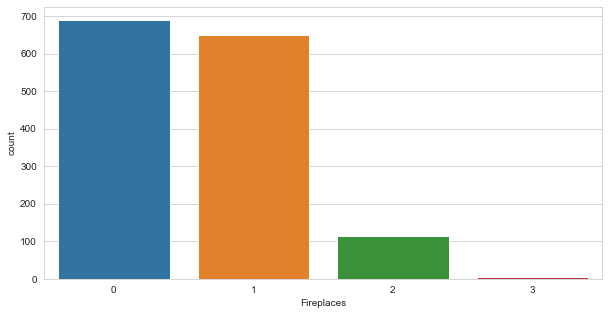

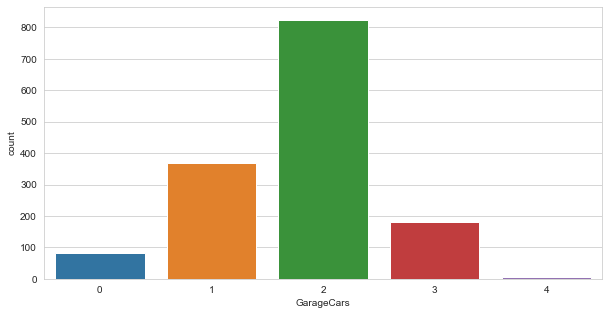

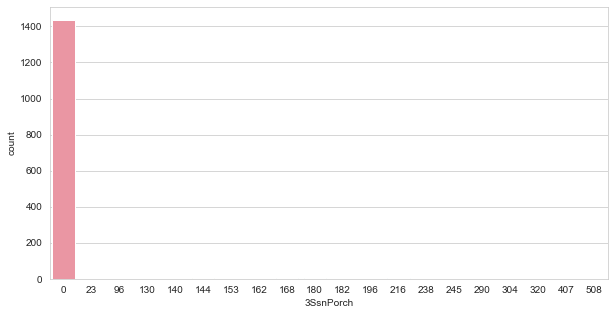

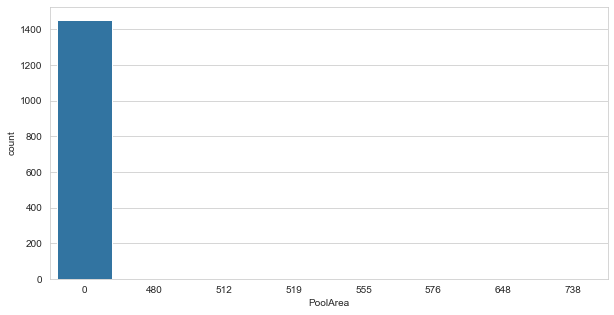

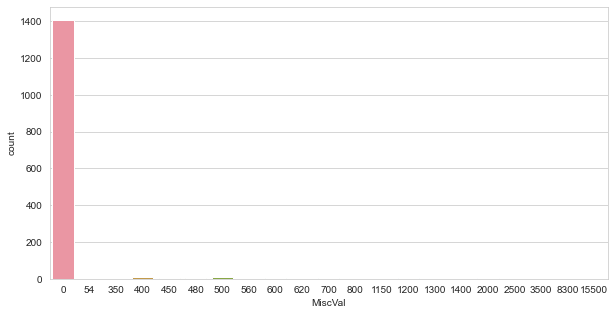

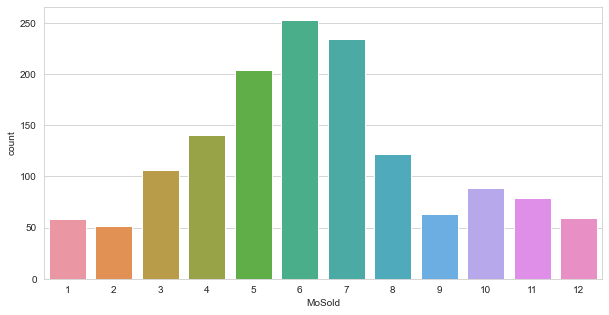

In [26]:
# Visualizing the discrrete variables.

for dis in dis_features.columns:
    plt.figure(figsize=(10,5))
    x = sns.countplot(dis_features[dis], data = df_house)
    plt.show()

<Figure size 1296x864 with 0 Axes>

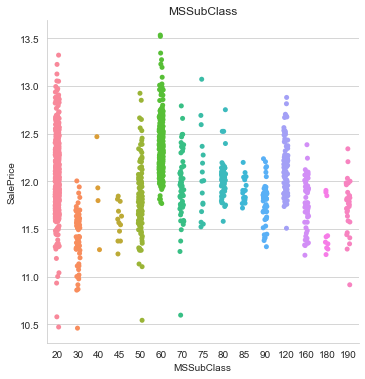

<Figure size 1296x864 with 0 Axes>

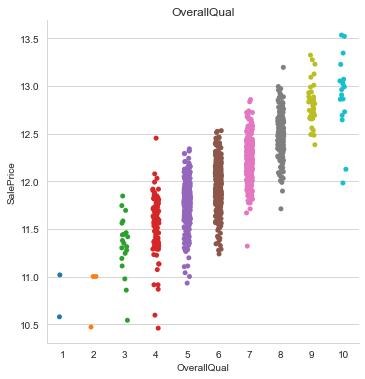

<Figure size 1296x864 with 0 Axes>

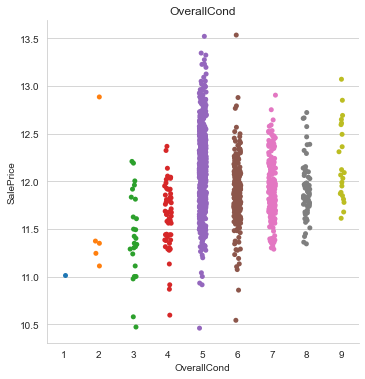

<Figure size 1296x864 with 0 Axes>

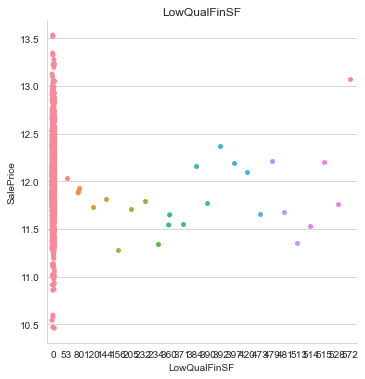

<Figure size 1296x864 with 0 Axes>

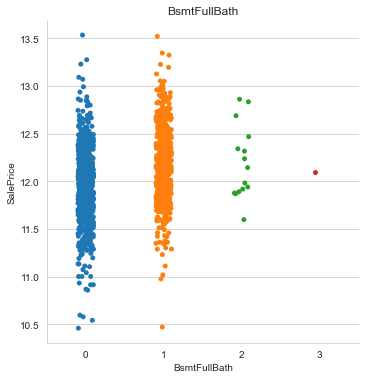

<Figure size 1296x864 with 0 Axes>

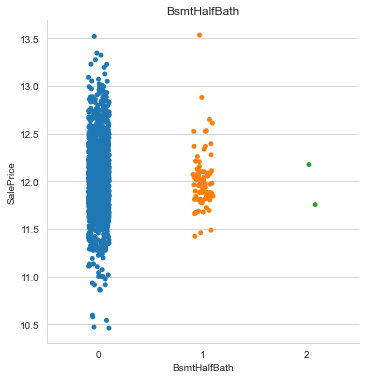

<Figure size 1296x864 with 0 Axes>

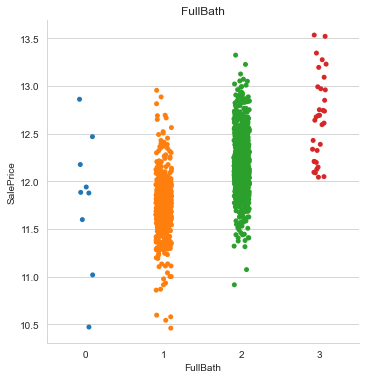

<Figure size 1296x864 with 0 Axes>

<Figure size 1296x864 with 0 Axes>

<Figure size 1296x864 with 0 Axes>

<Figure size 1296x864 with 0 Axes>

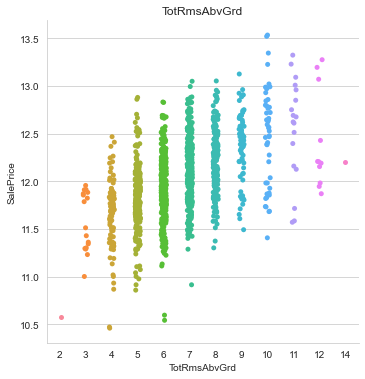

<Figure size 1296x864 with 0 Axes>

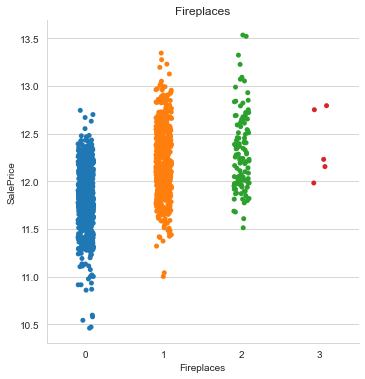

<Figure size 1296x864 with 0 Axes>

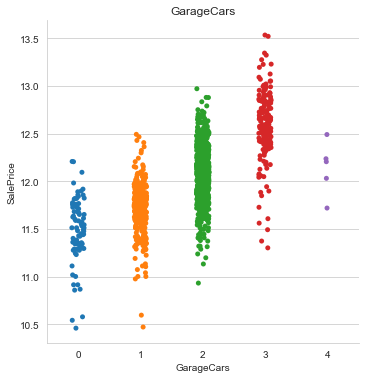

<Figure size 1296x864 with 0 Axes>

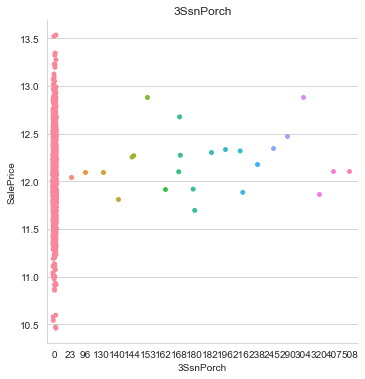

<Figure size 1296x864 with 0 Axes>

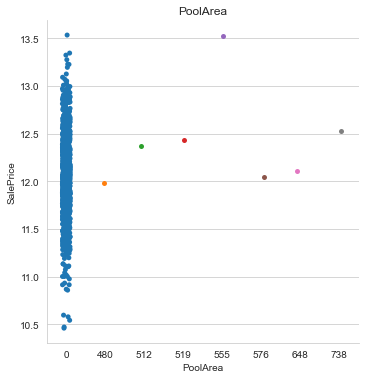

<Figure size 1296x864 with 0 Axes>

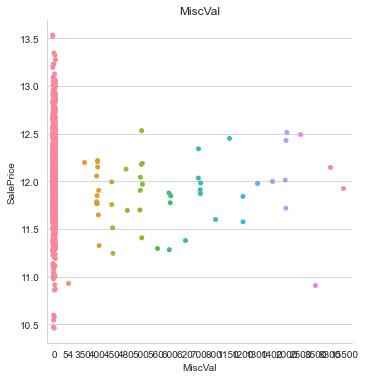

<Figure size 1296x864 with 0 Axes>

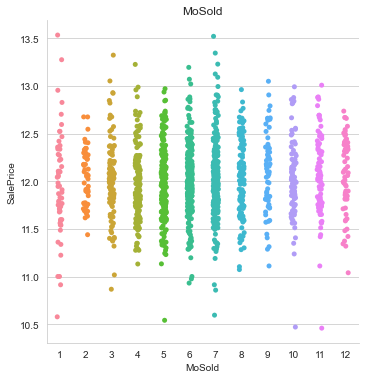

In [27]:
# Now Let's compare all the other discrete features with the target variable.

for feature in dis_features:
    plt.figure(figsize=(18,12))
    sns.catplot(x = df_house[feature], y= df_house["SalePrice"], data = df_house)
    plt.title(feature)

###### Continous Variables

In [20]:
# Creating a list of the discrrete type variables.

continous_features = df_house[[feature for feature in num_features if feature not in year_features+dis_features]]
print('Total Continous Variables:', len(continous_features.columns), '\n')
continous_features.head(2)

Total Continous Variables: 16 



LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500

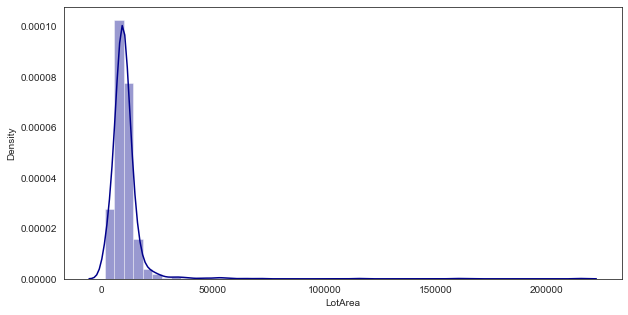

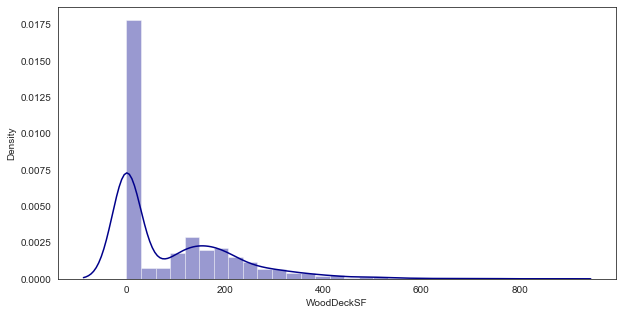

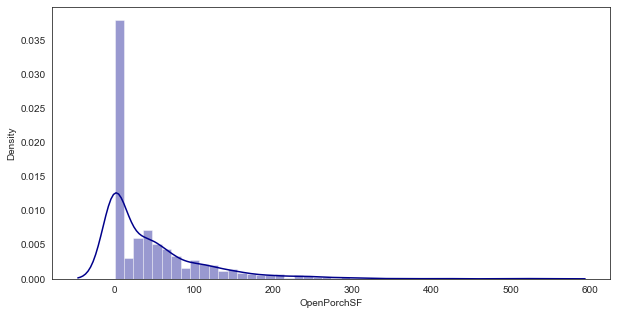

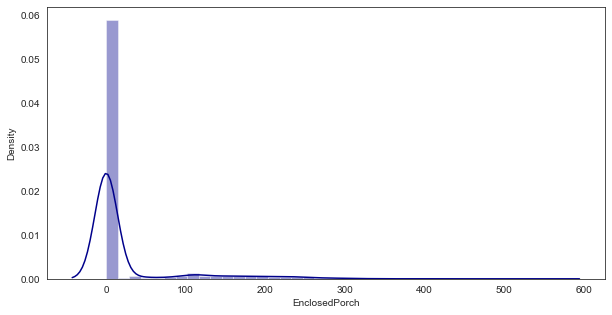

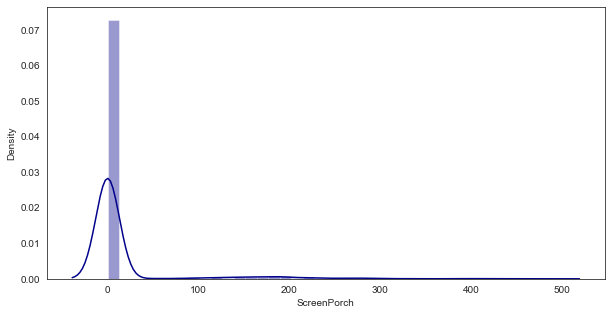

In [29]:
# Visualizing the distribution of columns using distribution plot of the continous features.

sns.set_style('white')
for feature in continous_features.columns:
    if feature!= 'SalePrice':
        plt.figure(figsize=(10,5))
        x = sns.distplot(continous_features[feature], color = 'darkblue')
        plt.show()

From the above distribution plots, it is seen that the data is skewed and it is righly/positively skewed which needs to be treated. The treatment will be done using log transformation i order to normalize this data.

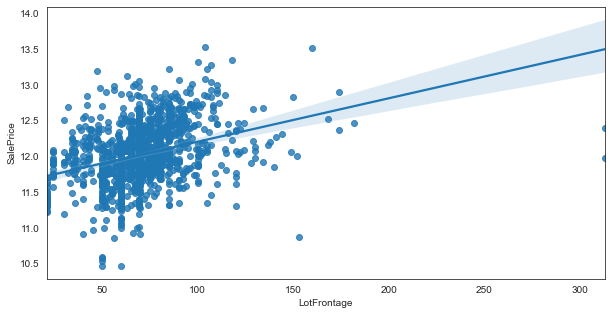

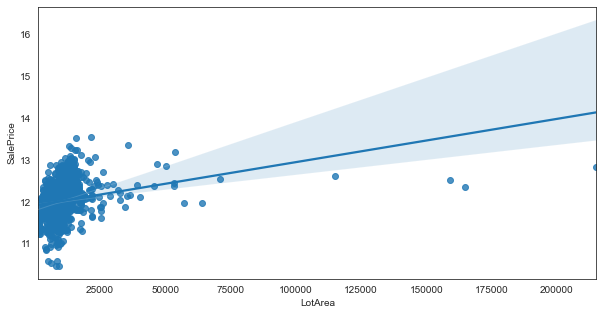

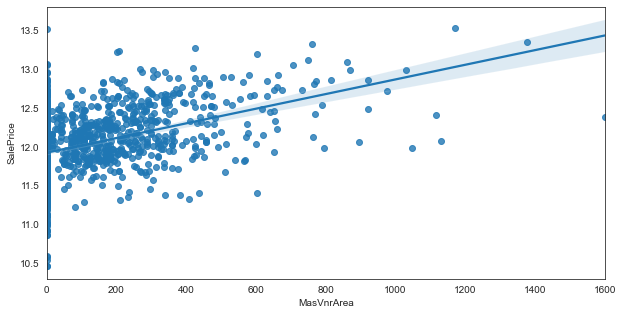

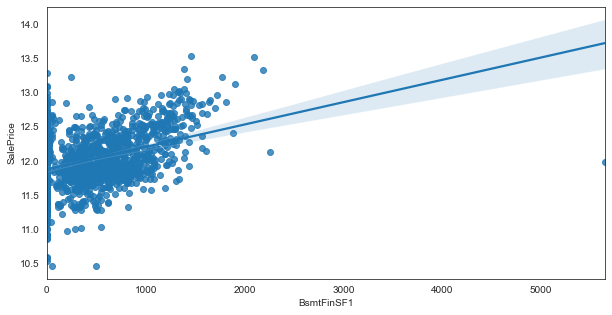

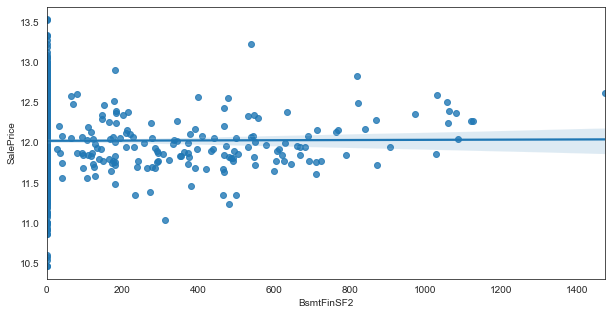

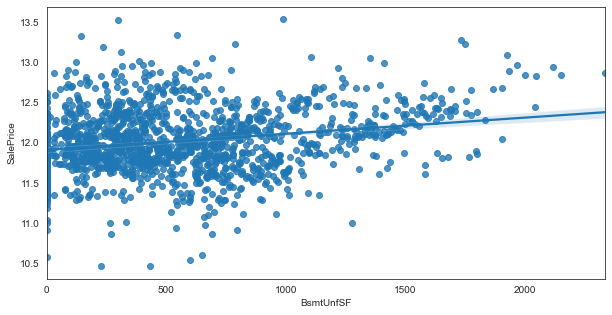

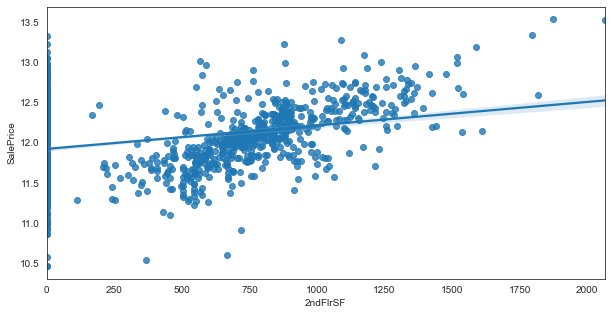

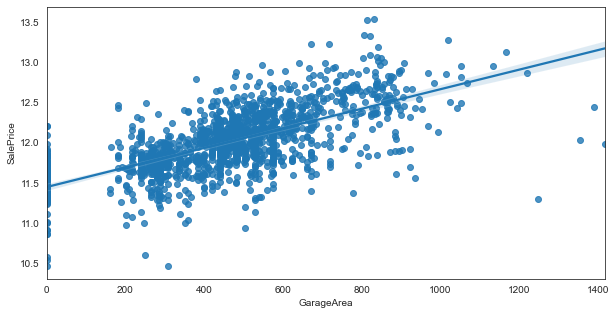

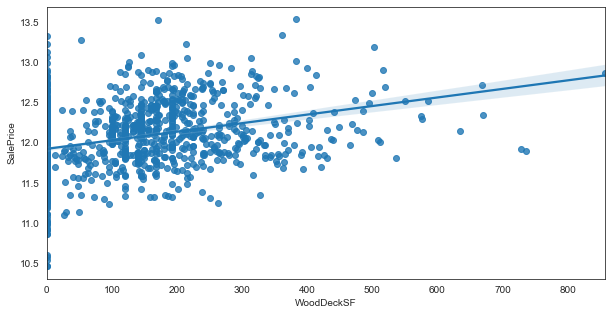

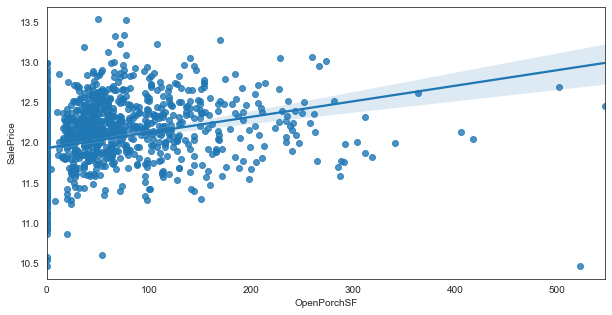

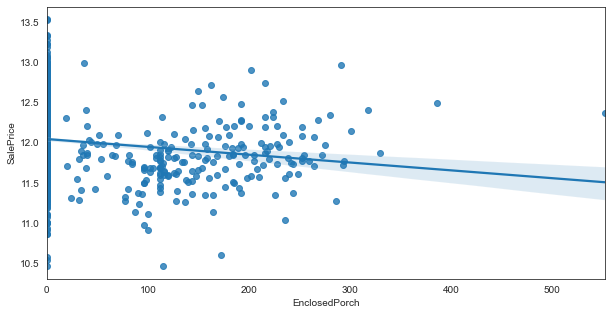

In [30]:
# Visualizing the relationship of continous variables with the target variable i.e. 'SalePrice'.

sns.set_style('white')
for feature in continous_features.columns:
    if feature!= 'SalePrice':
        plt.figure(figsize=(10,5))
        x = sns.regplot(x = df_house[feature], y = df_house['SalePrice'], data = df_house)
        plt.show()

###### Treating the Skewness of the continous variables

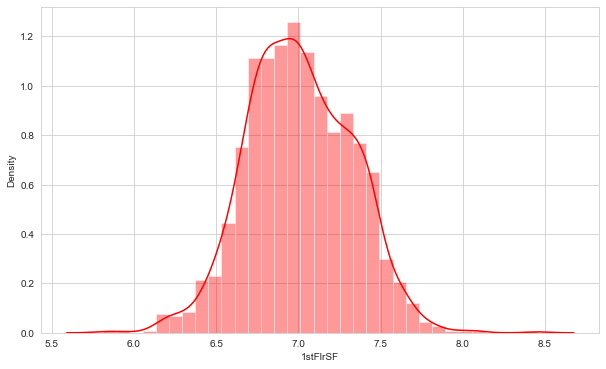

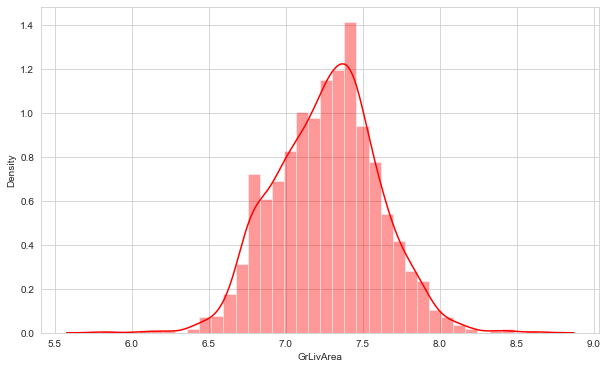

In [21]:
# Transforming the skewd variables i.e. normalizing the variables using log transformation. 

for col in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']:
        df_house[col] = np.log(df_house[col])
        plt.figure(figsize=(10,6))
        x = sns.distplot(df_house[col], color = 'r')
        plt.show()

Now, the skewness has been treated.

###### Categorical Variables

In [22]:
# Finding the categorical features in the dataset.

cat_features = df_house.select_dtypes(exclude = [np.number])
print(cat_features.columns)
print("\n Total categorical features : ", len(cat_features.columns), '\n')
cat_features.head()

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

 Total categorical features :  43 



MSZoning Street     Alley LotShape LandContour Utilities LotConfig  \
0       RL   Pave  No Alley      Reg         Lvl    AllPub    Inside   
1       RL   Pave  No Alley      Reg         Lvl    AllPub       FR2   
2       RL   Pave  No Alley      IR1         Lvl    AllPub    Inside   
3       RL   Pave  No Alley      IR1         Lvl    AllPub    Corner   
4       RL   Pave  No Alley      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation  \
0  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   
1  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock   
2  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   
3  CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil   
4  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       Gd       TA           No          GLQ          Unf    GasA        Ex   
1       Gd       TA           Gd          ALQ          Unf    GasA        Ex   
2       Gd       TA           Mn          GLQ          Unf    GasA        Ex   
3       TA       Gd           No          ALQ          Unf    GasA        Gd   
4       Gd       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional   FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ  No Fireplace     Attchd   
1          Y      SBrkr          TA        Typ            TA     Attchd   
2          Y      SBrkr          Gd        Typ            TA     Attchd   
3          Y      SBrkr          Gd        Typ            Gd     Detchd   
4          Y      SBrkr          Gd        Typ            TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive   PoolQC     Fence  \
0          RFn         TA         TA          Y  No Pool  No Fence   
1          RFn         TA         TA          Y  No Pool  No Fence   
2          RFn         TA         TA          Y  No Pool  No Fence   
3          Unf         TA         TA          Y  No Pool  No Fence   
4          RFn         TA         TA          Y  No Pool  No Fence   

  MiscFeature SaleType SaleCondition  
0        None       WD        Normal  
1        None       WD        Normal  
2        None       WD        Normal  
3        None       WD       Abnorml  
4        None       WD        Normal

In [23]:
# Checking the value counts of the categorical variables.

for count in cat_features.columns:
    x = cat_features[count].value_counts()
    print("--------",count,"--------\n",x, '\n')
    print('{} has {} categories'.format(count,len(df_house[count].unique())))
    print('\n')

-------- MSZoning --------
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

MSZoning has 5 categories


-------- Street --------
 Pave    1454
Grvl       6
Name: Street, dtype: int64 

Street has 2 categories


-------- Alley --------
 No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64 

Alley has 3 categories


-------- LotShape --------
 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

LotShape has 4 categories


-------- LandContour --------
 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 

LandContour has 4 categories


-------- Utilities --------
 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 

Utilities has 2 categories


-------- LotConfig --------
 Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

LotConfig has 5 categories


-------- LandSlope --------
 Gtl

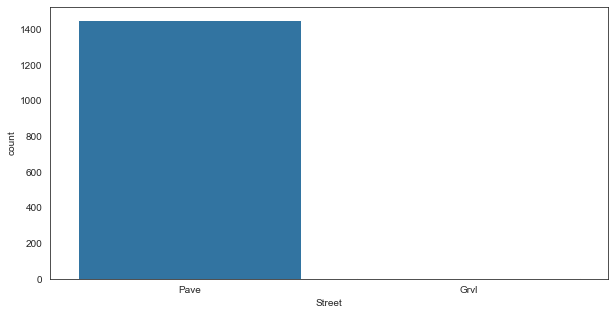

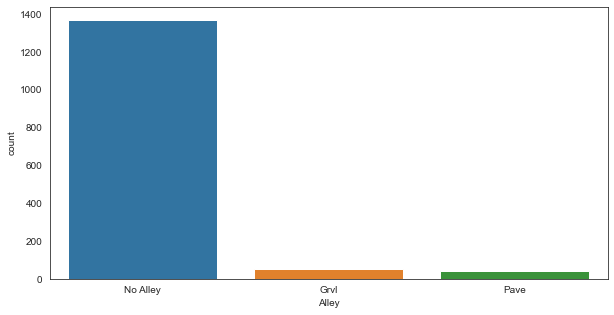

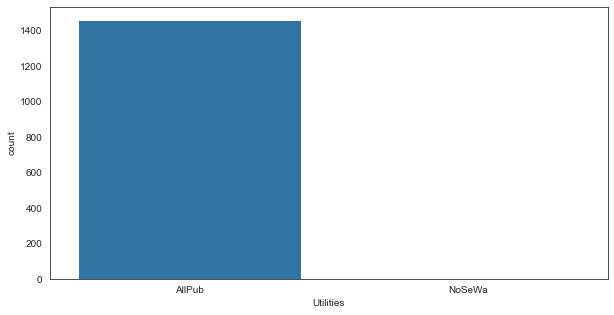

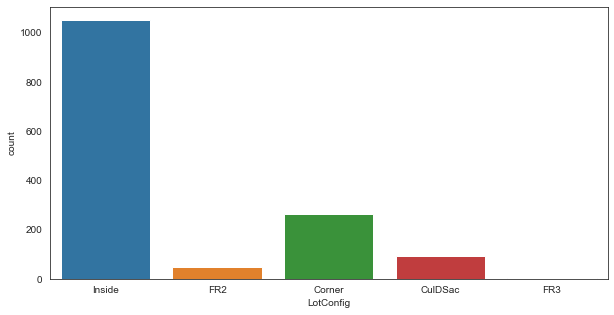

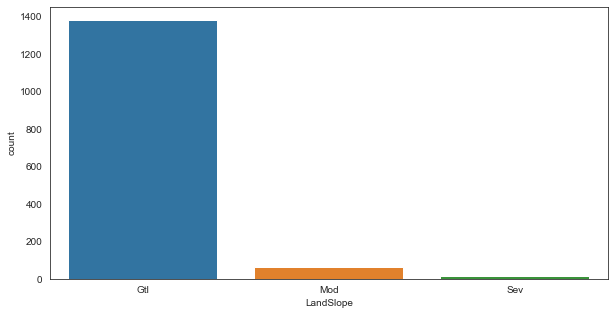

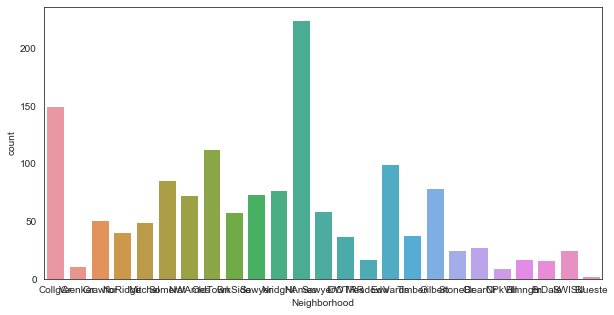

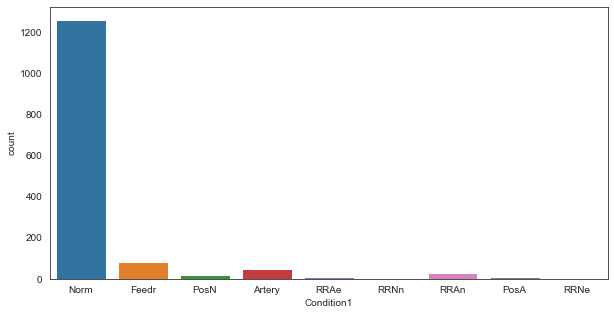

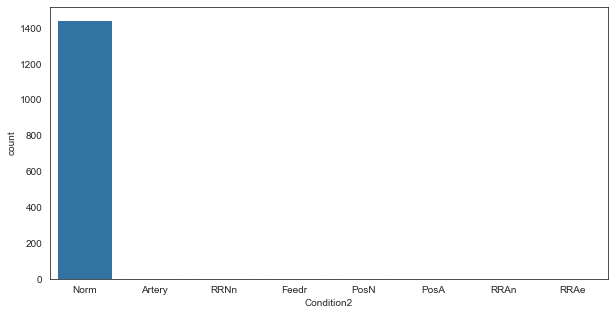

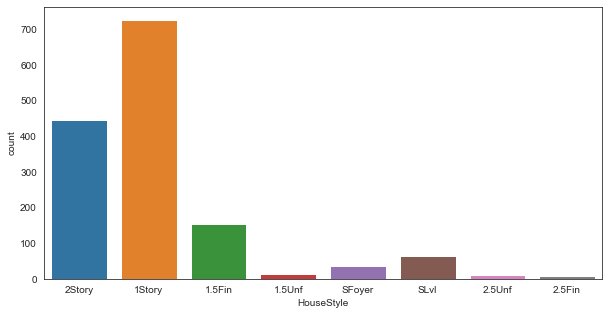

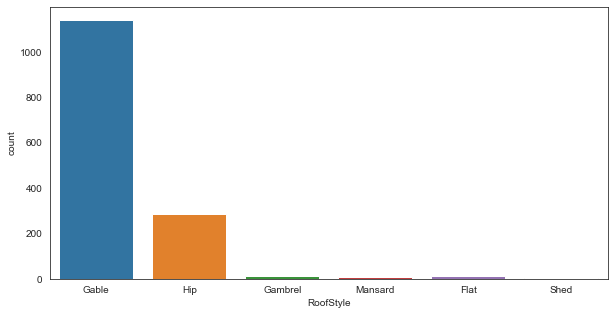

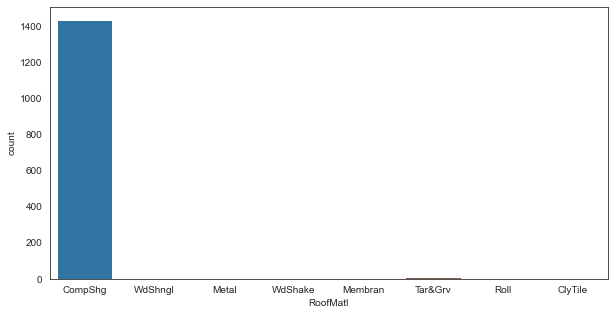

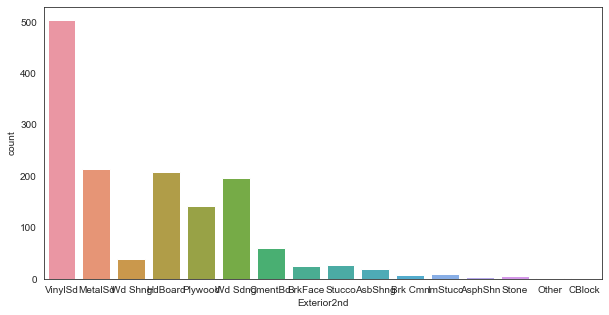

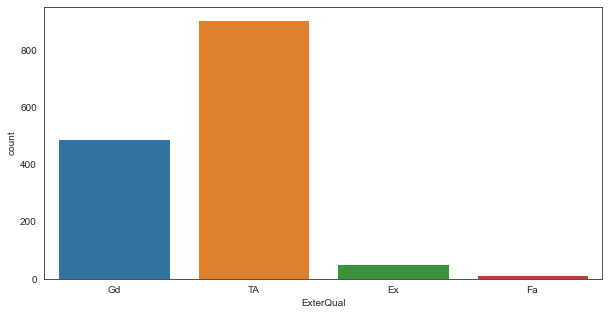

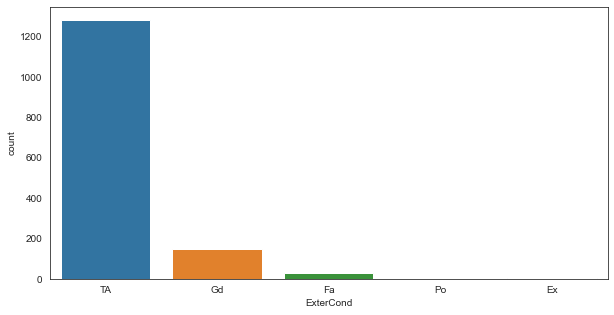

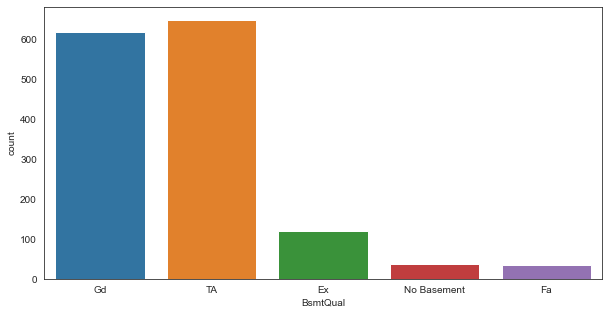

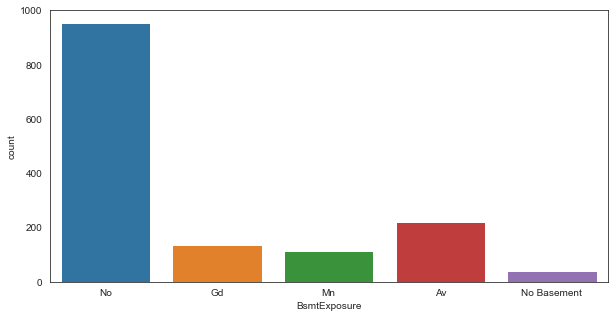

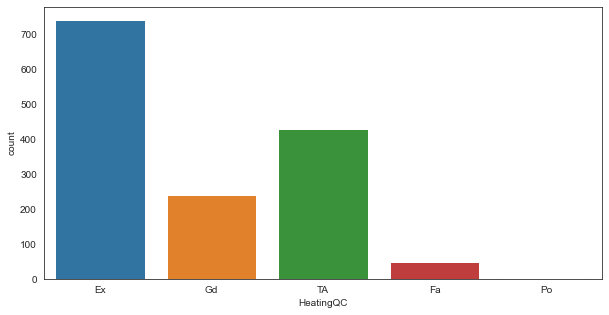

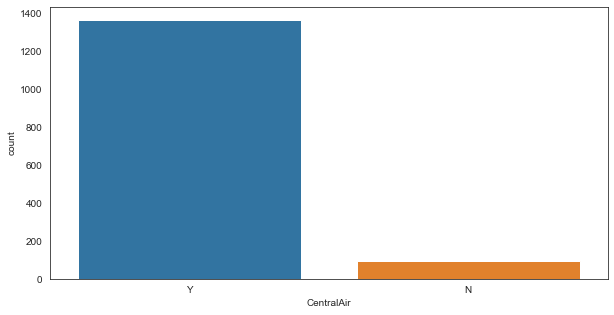

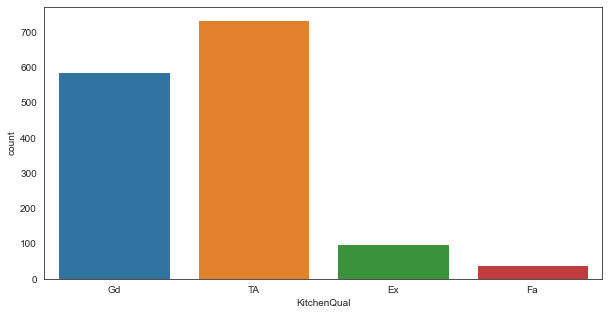

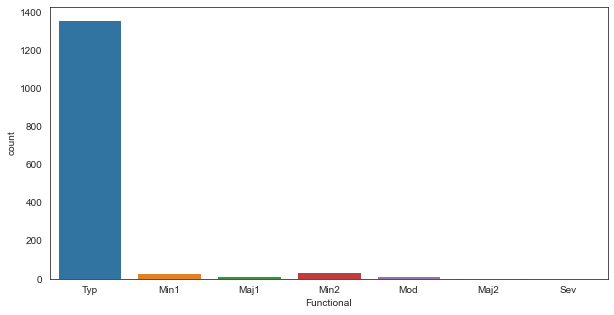

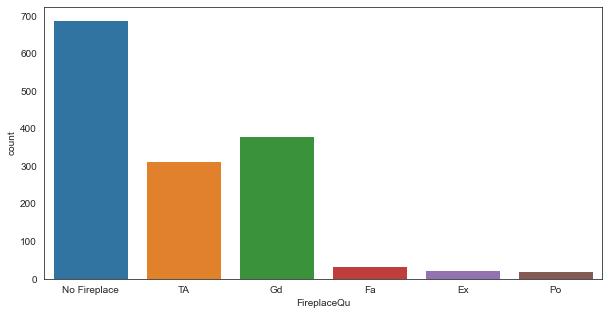

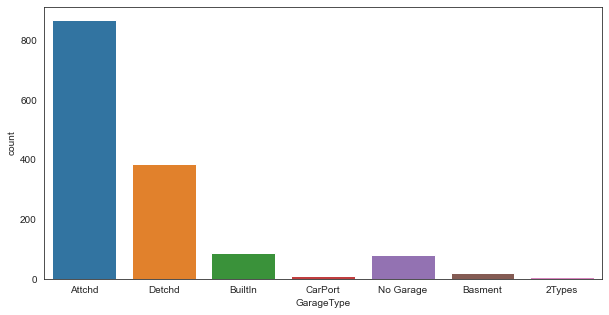

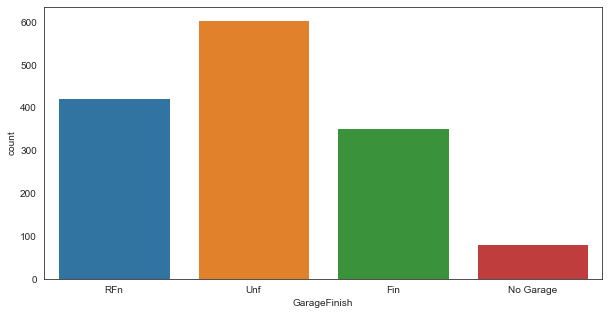

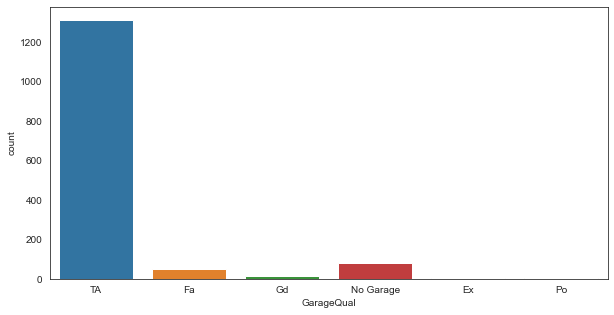

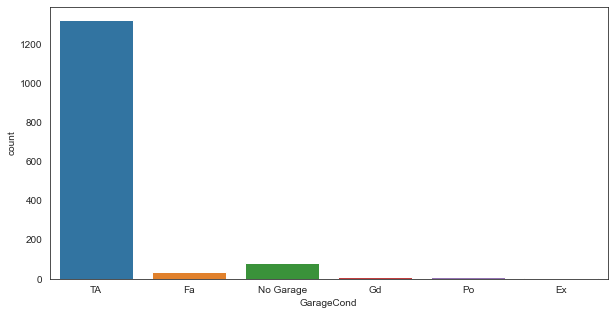

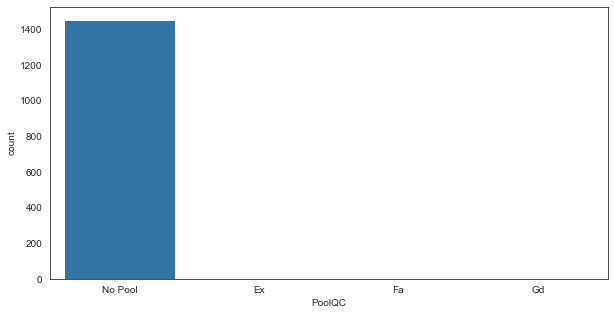

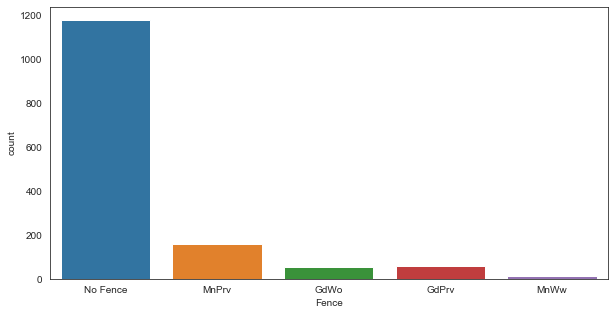

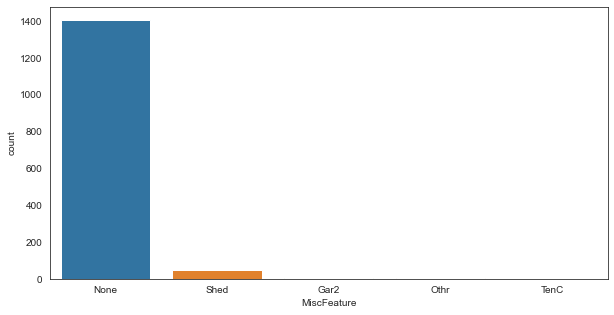

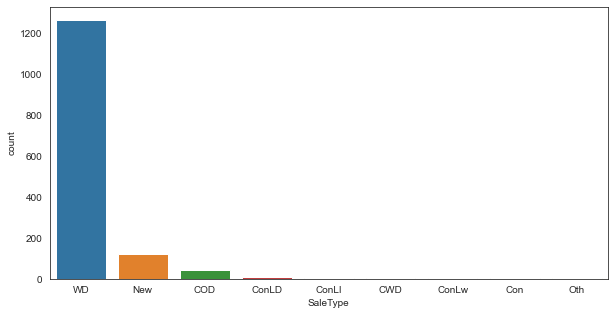

In [34]:
# Visualizing the counts of each categorical column/feature.

for feature in cat_features.columns:
    plt.figure(figsize=(10,5))
    x = sns.countplot(cat_features[feature], data = df_house)
    plt.show()

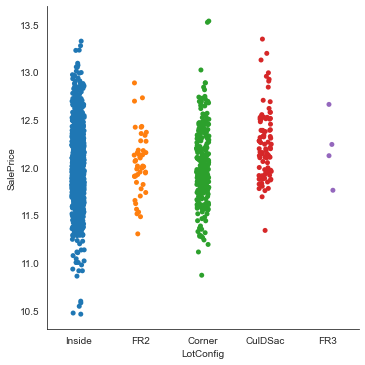

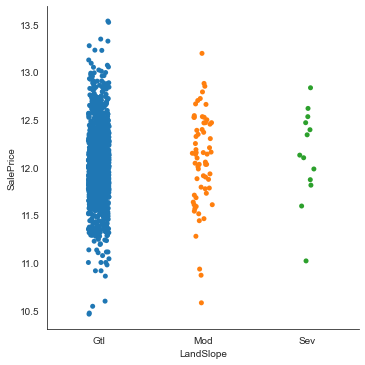

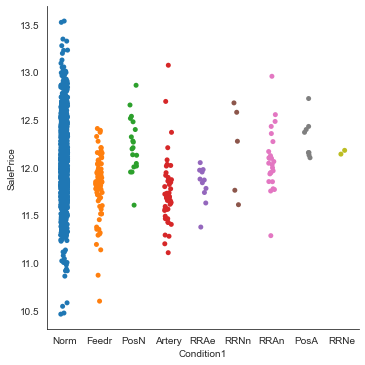

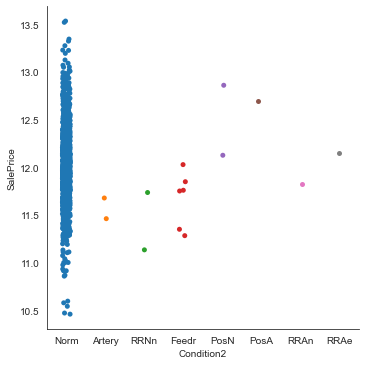

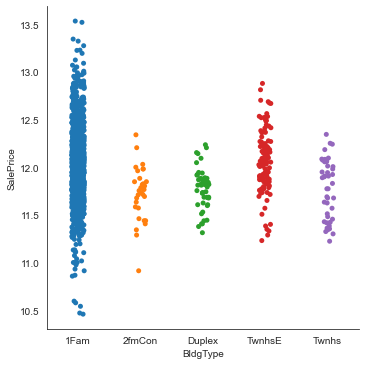

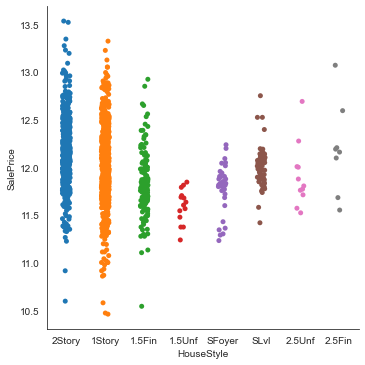

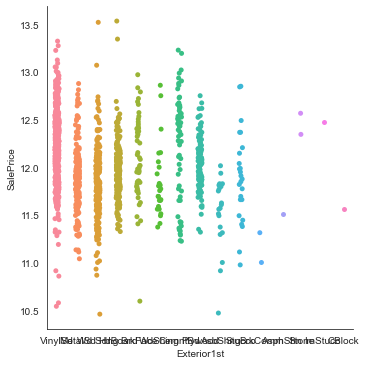

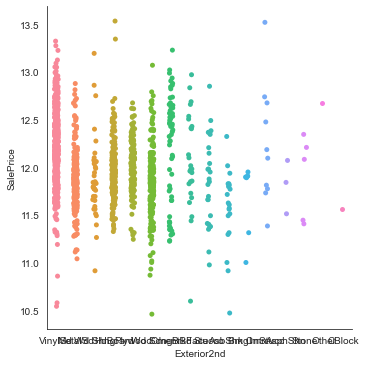

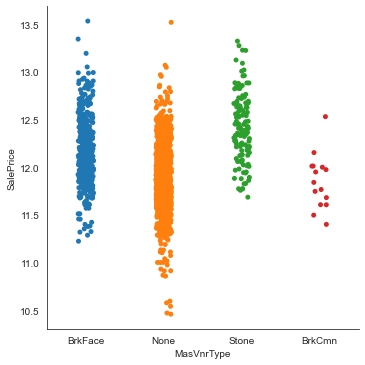

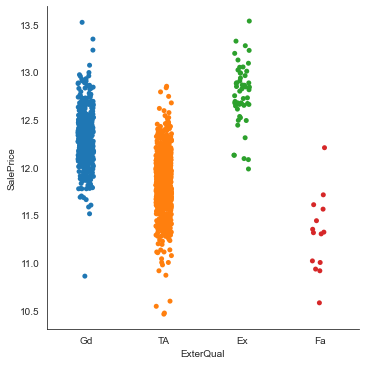

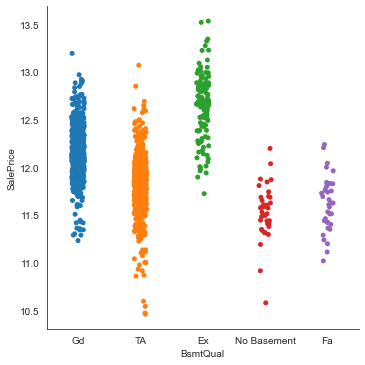

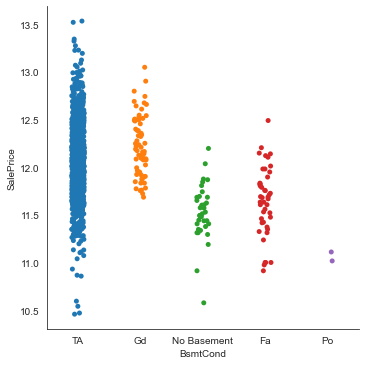

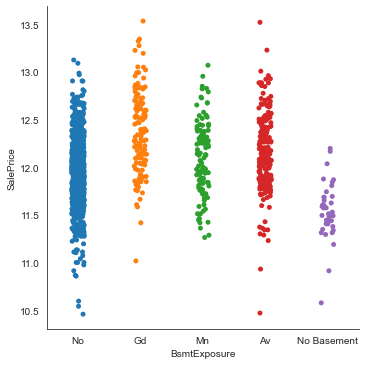

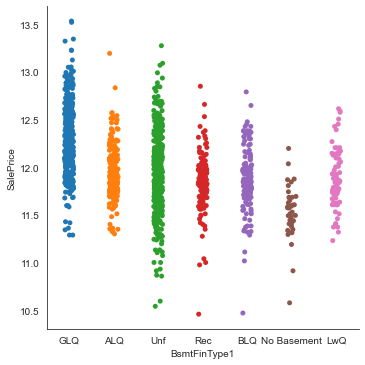

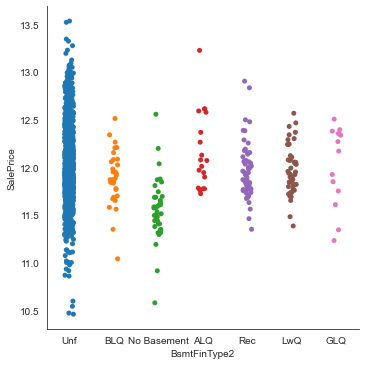

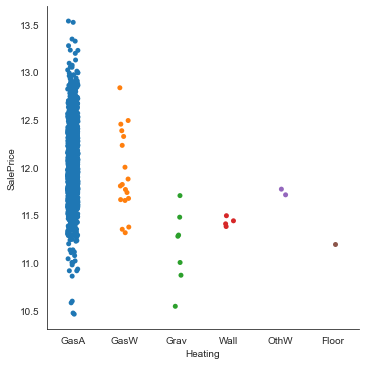

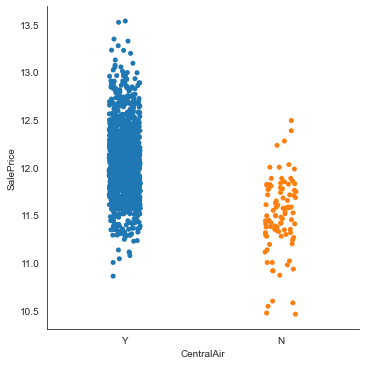

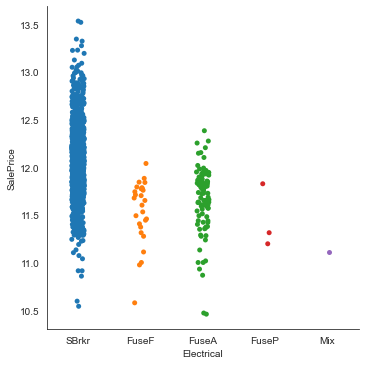

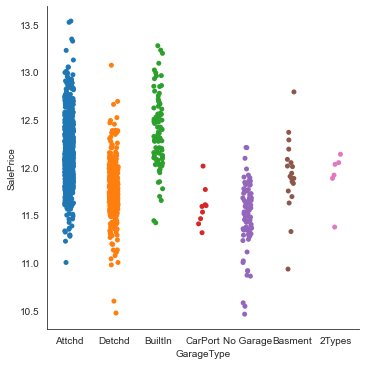

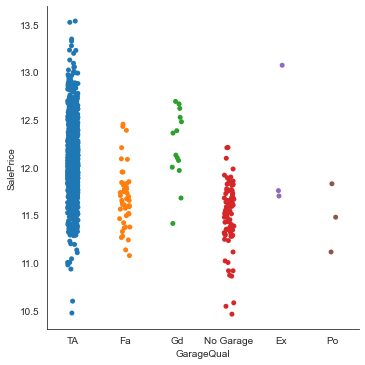

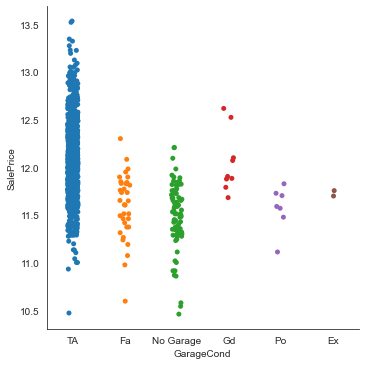

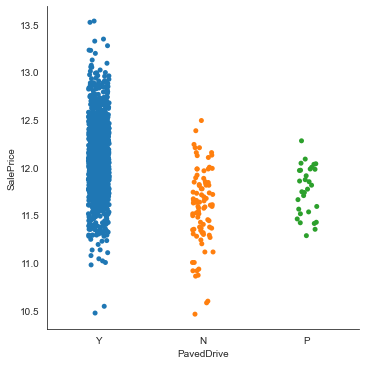

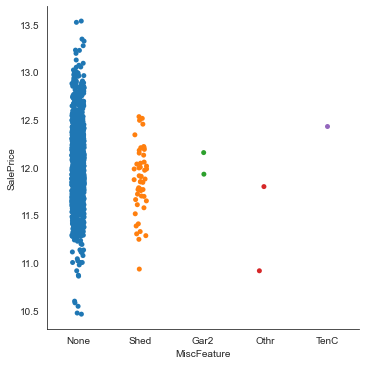

In [35]:
# Visualizing the relationship of categorical variables with the target variable i.e. 'SalePrice'.

for feature in cat_features:
    sns.catplot(x = df_house[feature], y = df_house['SalePrice'], data = df_house)
    plt.show()

###### Outliers

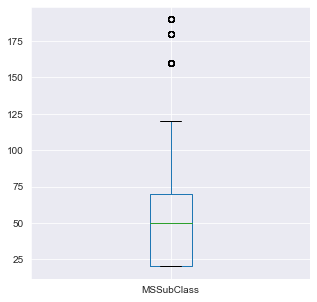

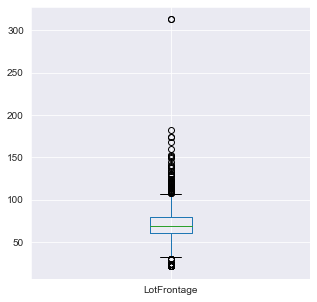

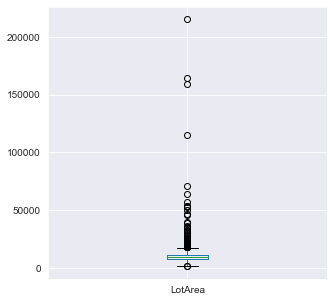

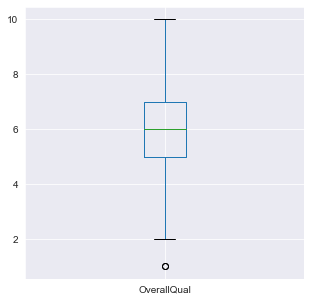

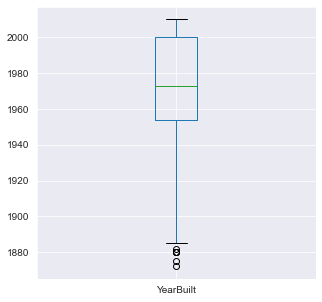

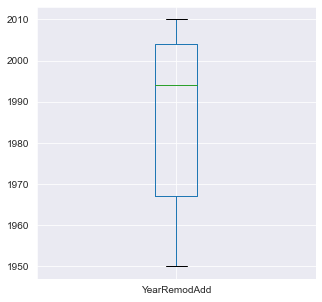

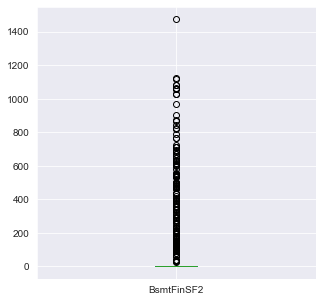

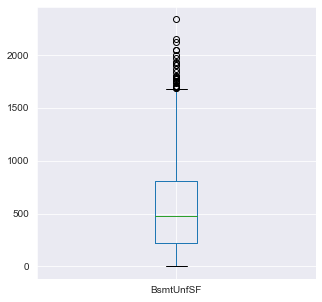

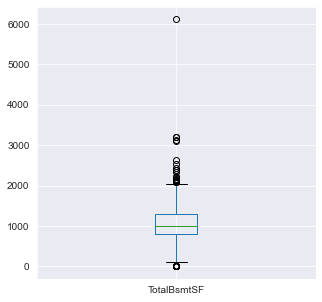

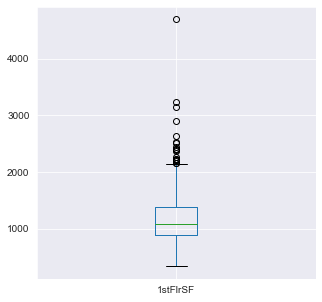

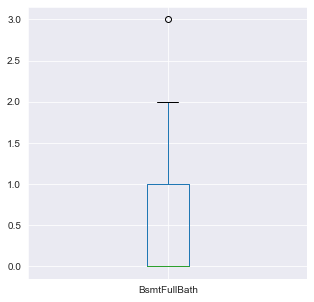

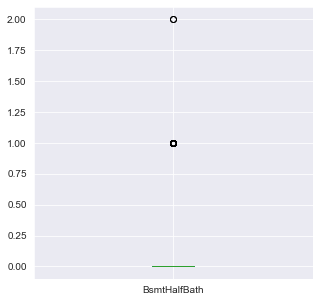

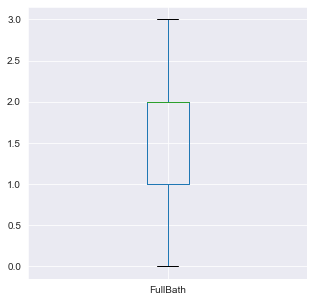

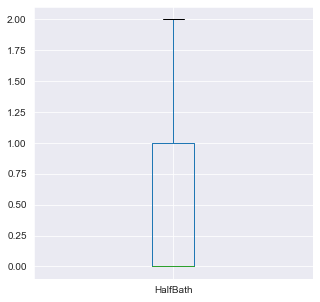

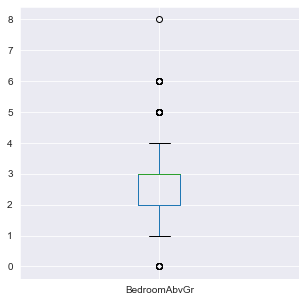

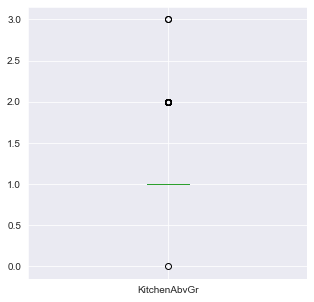

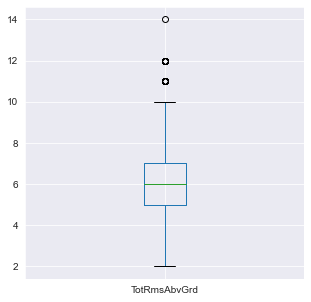

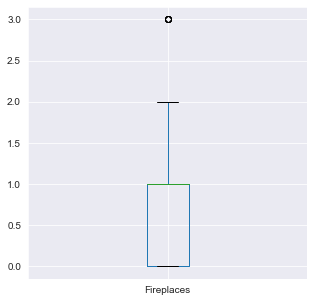

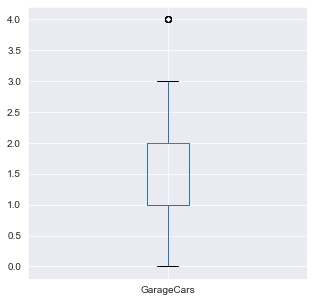

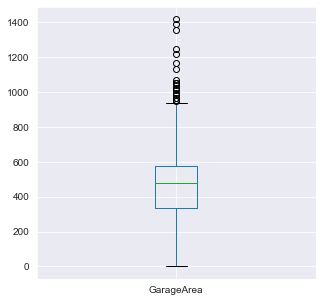

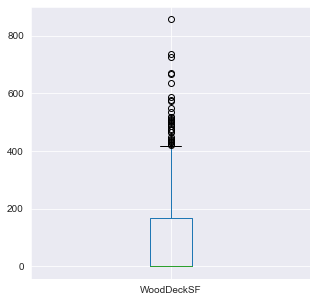

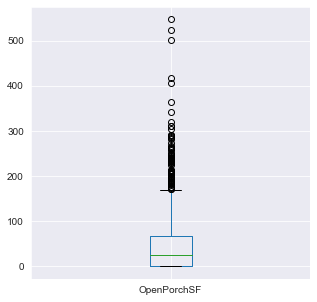

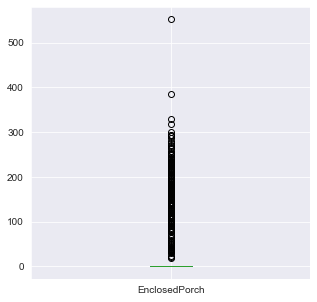

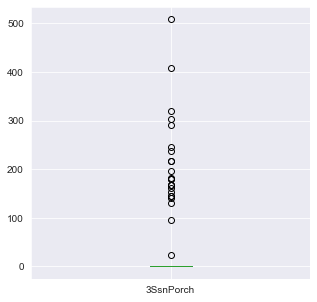

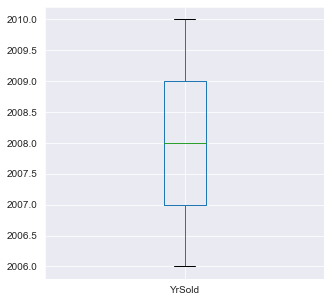

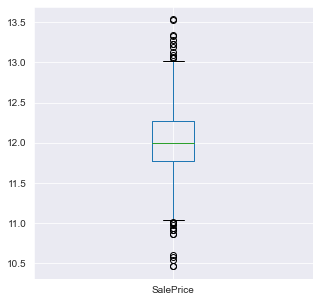

In [36]:
# Plotting the outliers.

sns.set_style('darkgrid')
for i in num_features.columns:
    plt.figure(figsize=(5,5))
    x = num_features[i].plot.box()
    plt.show()     

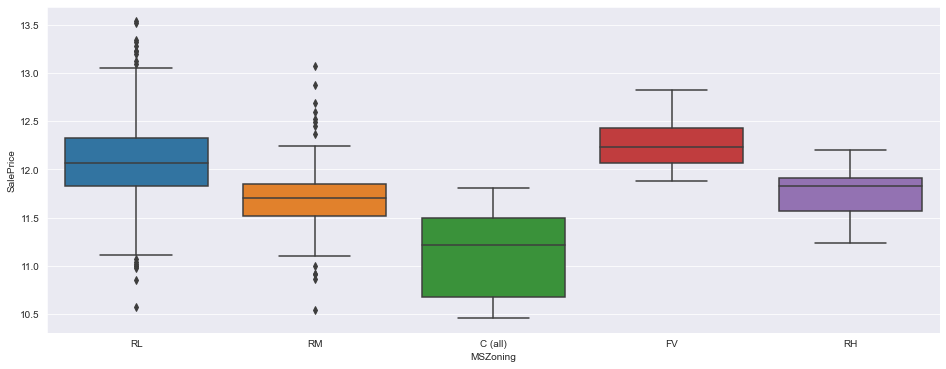

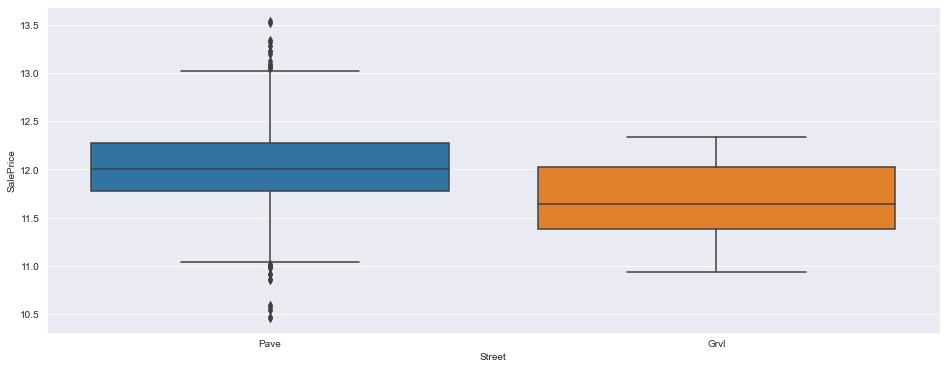

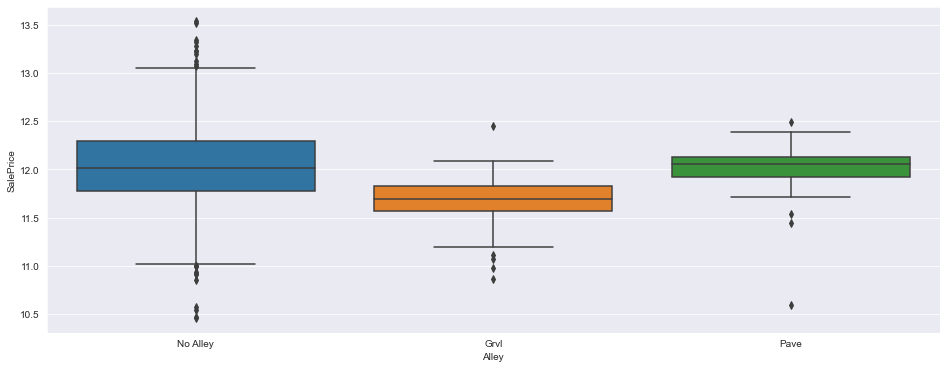

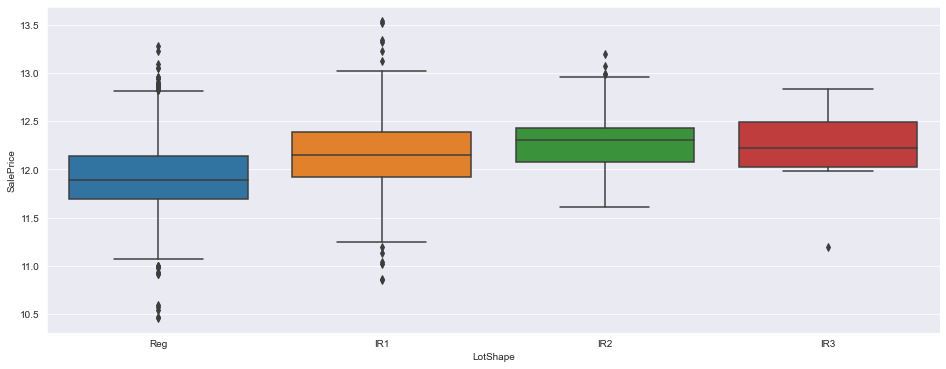

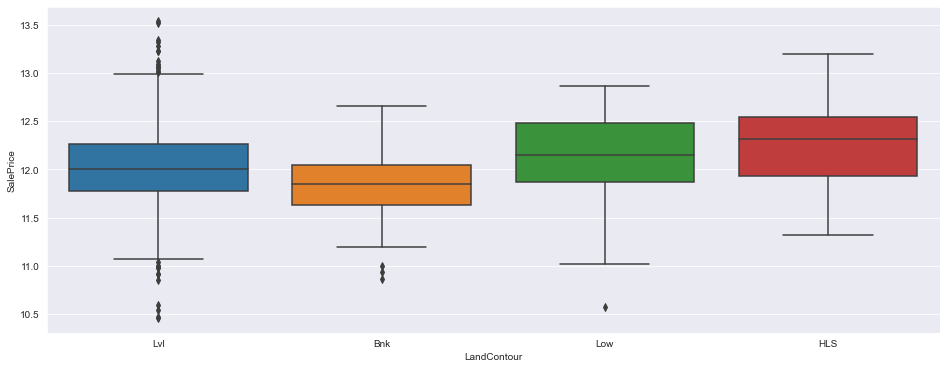

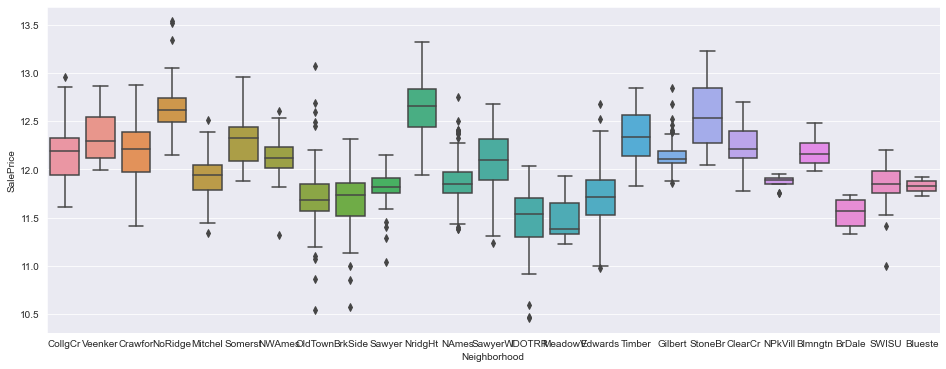

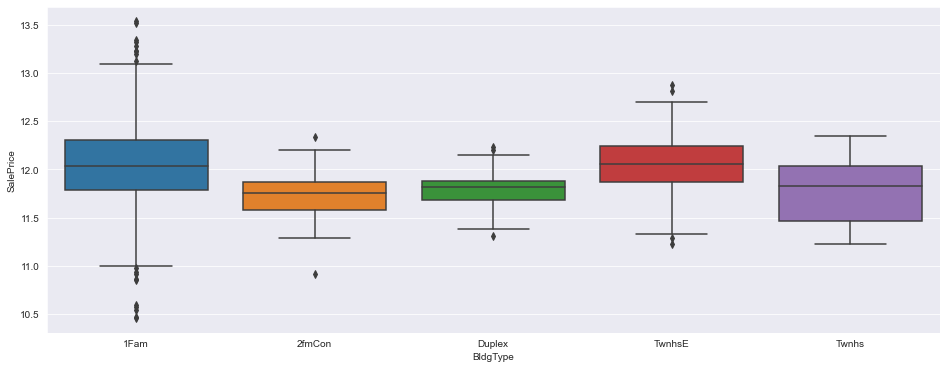

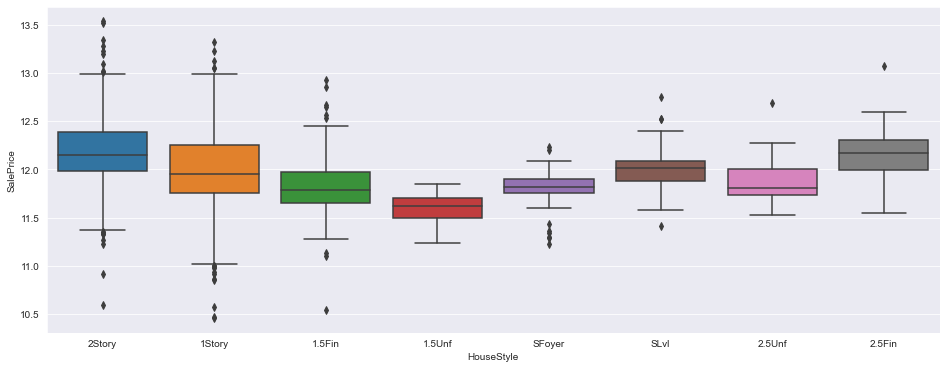

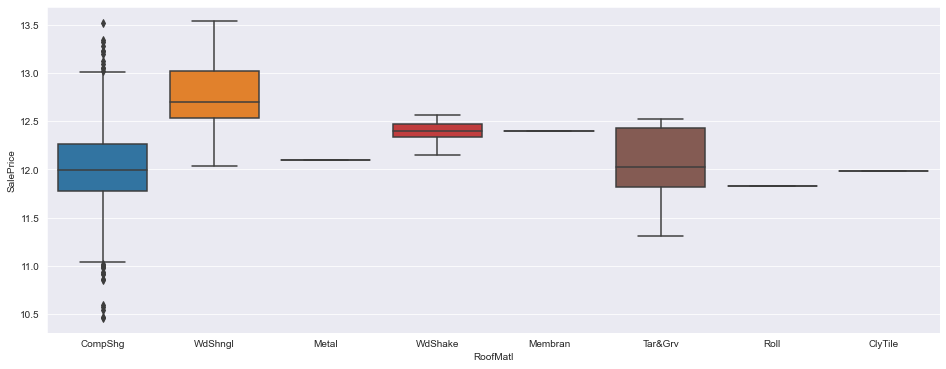

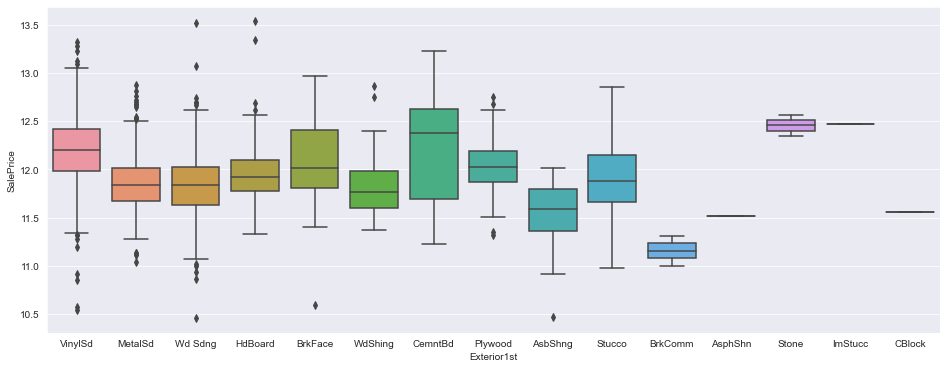

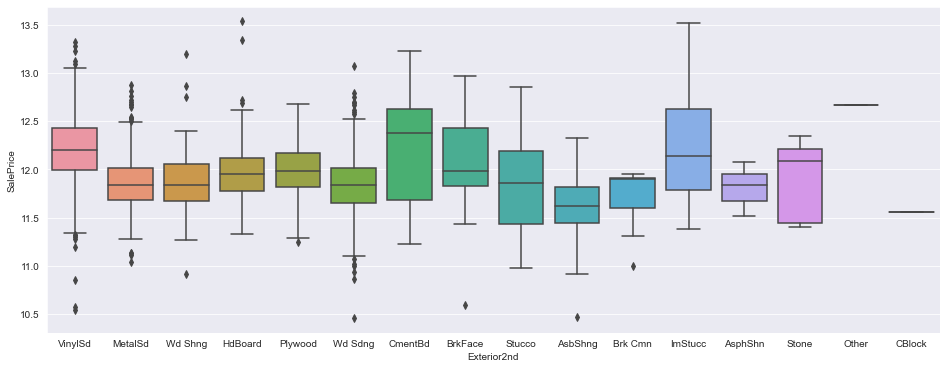

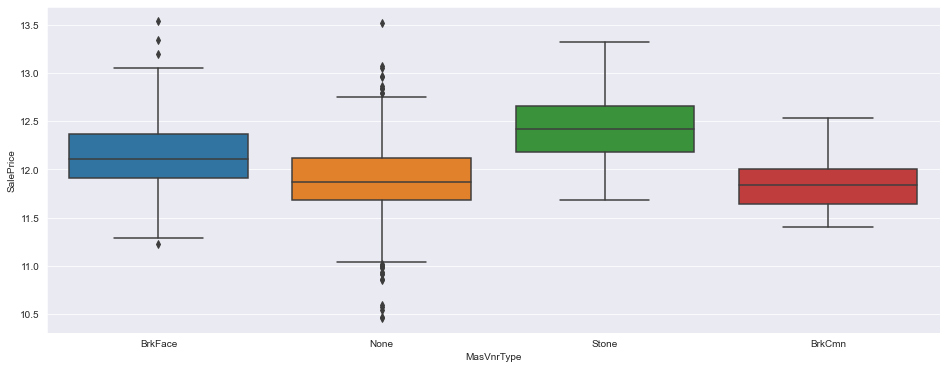

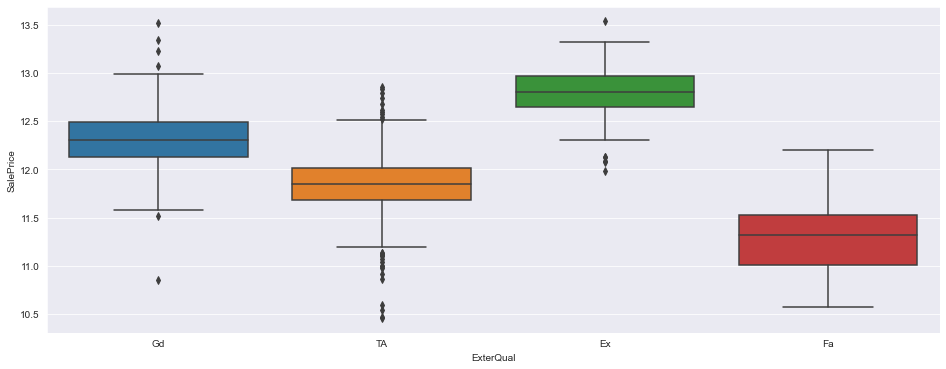

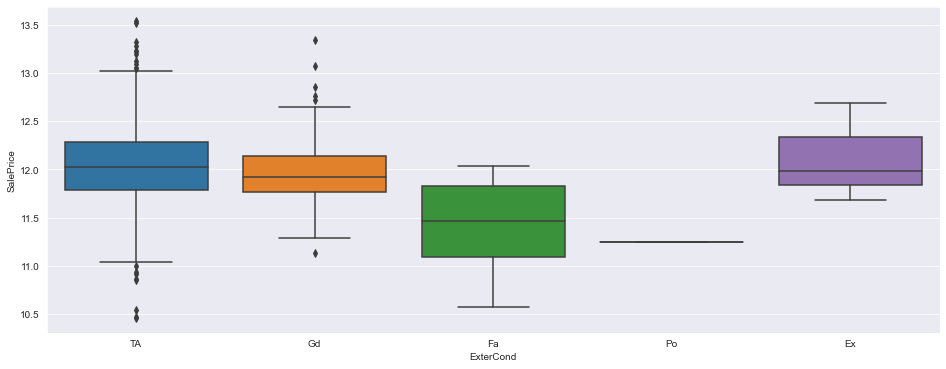

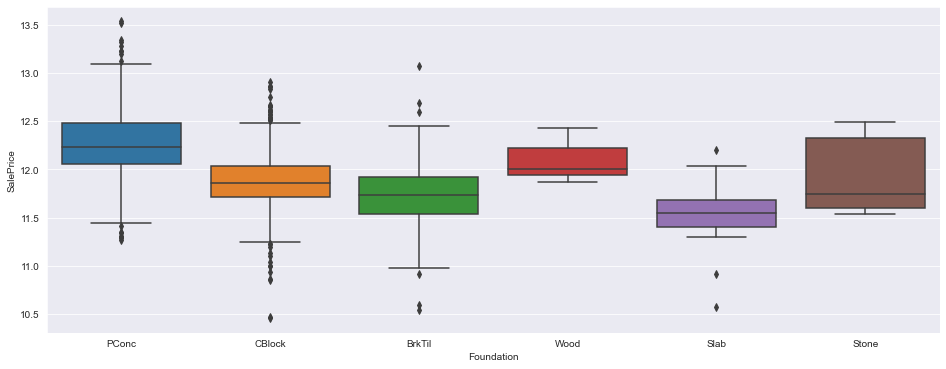

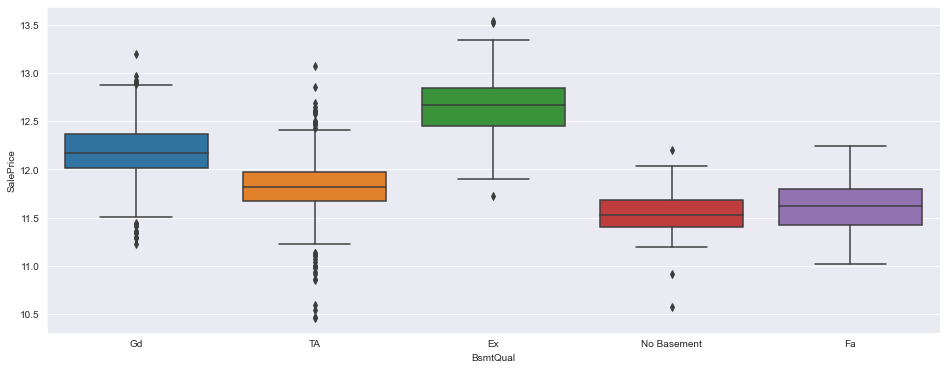

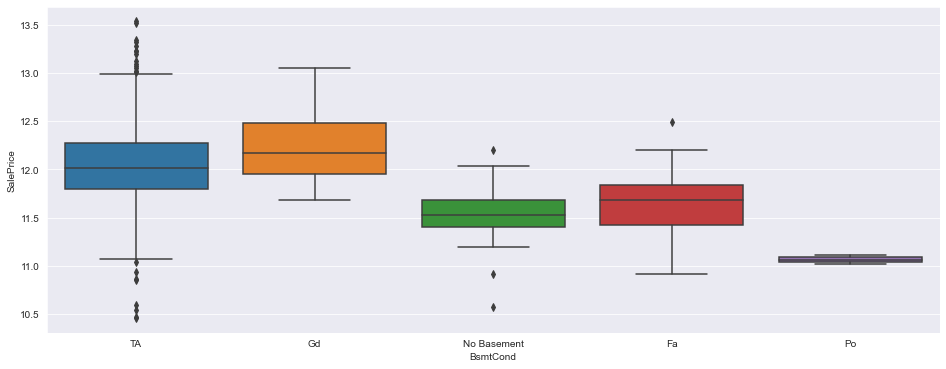

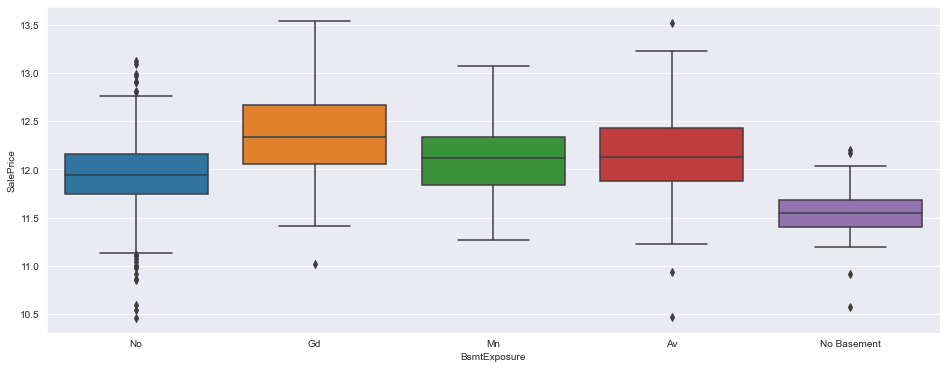

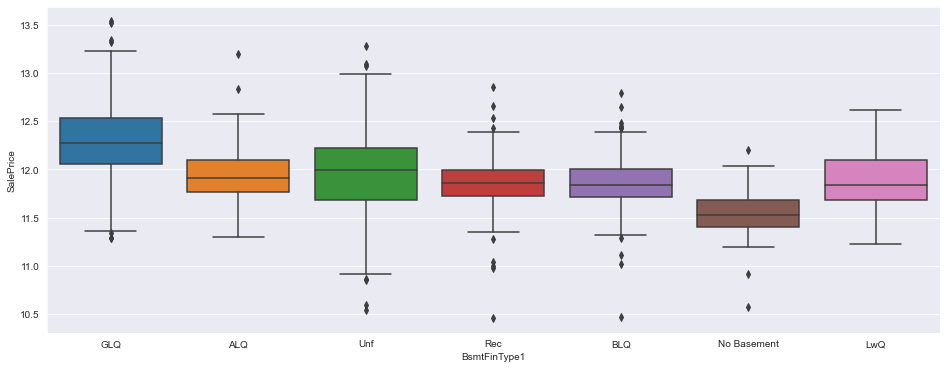

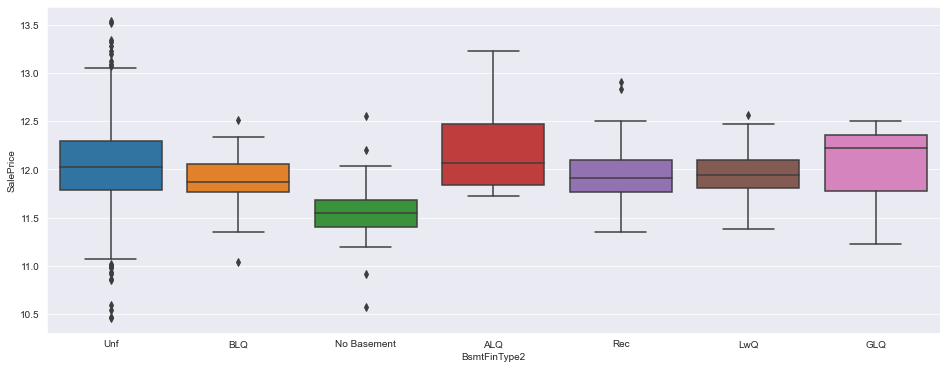

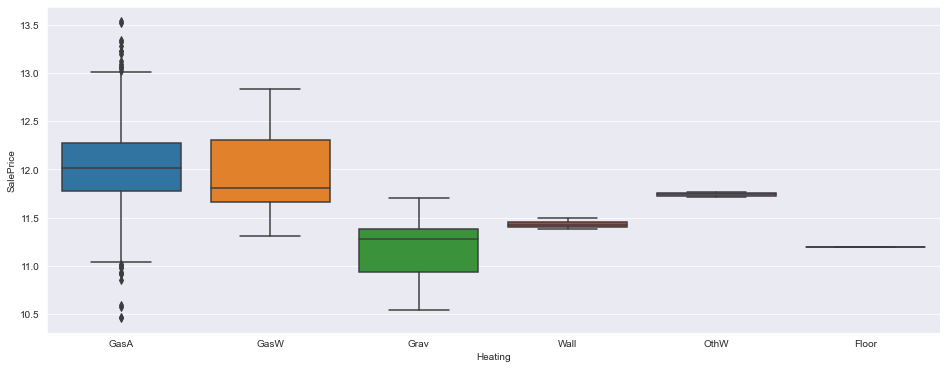

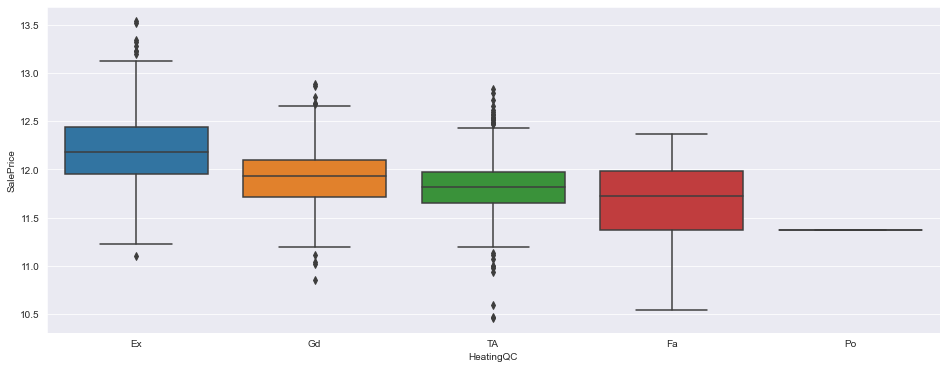

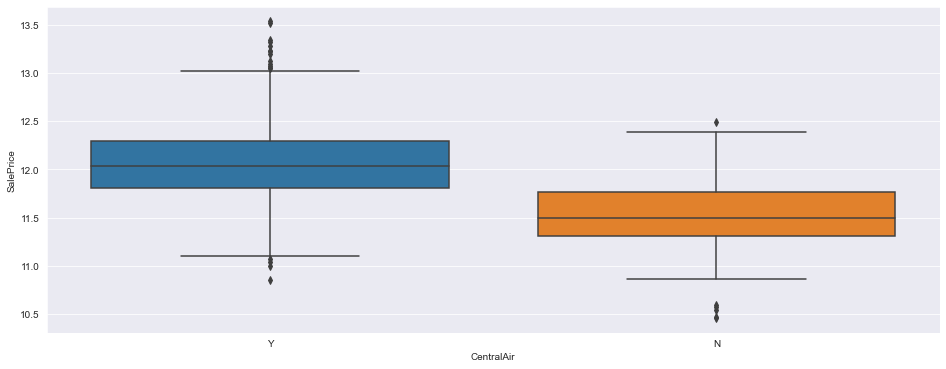

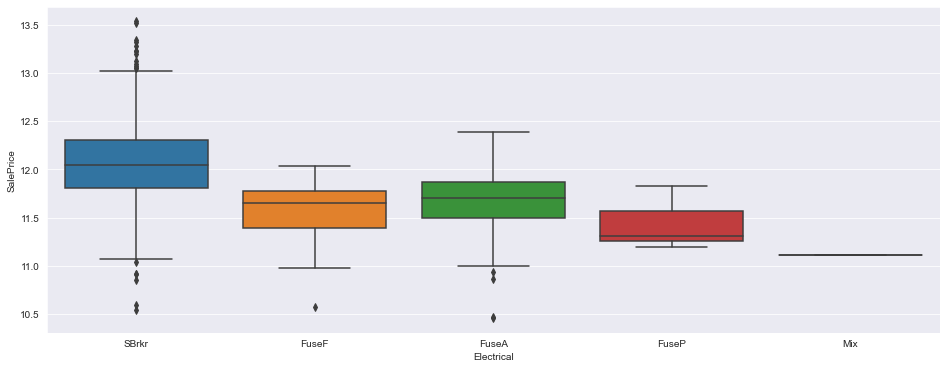

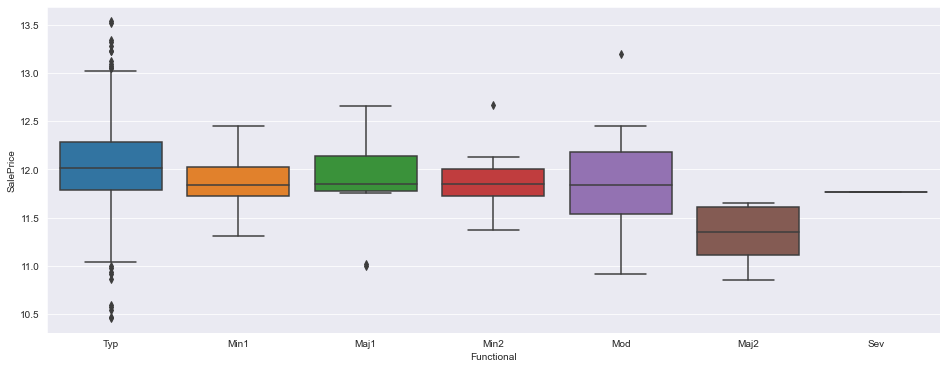

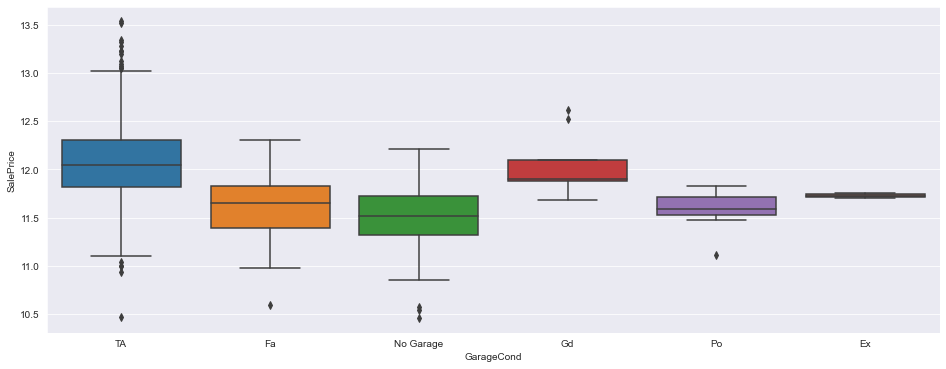

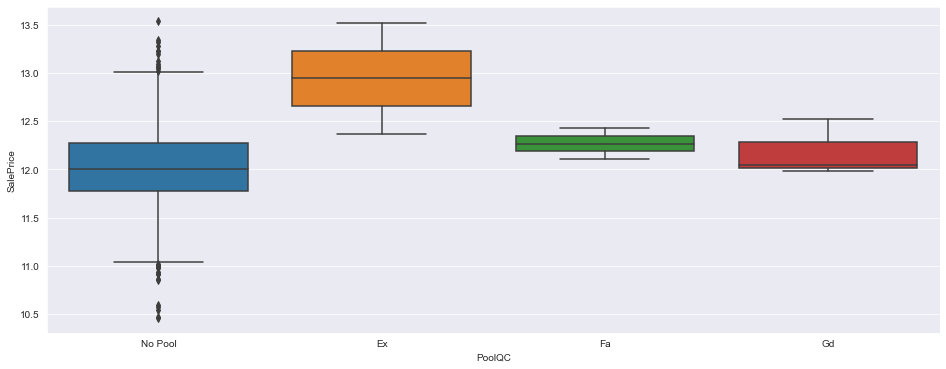

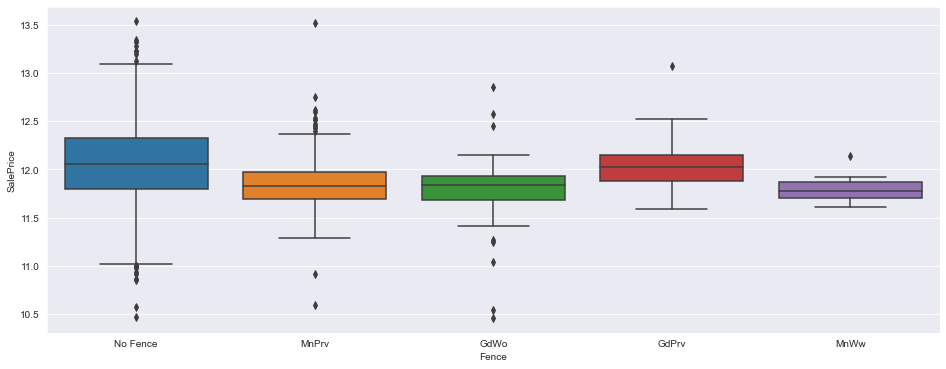

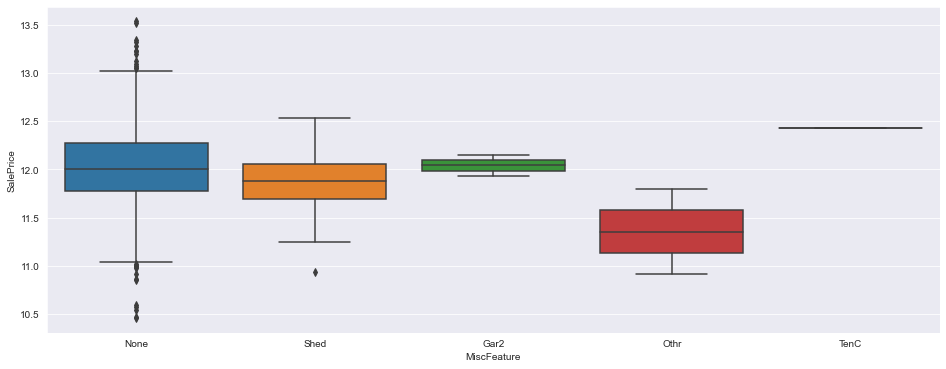

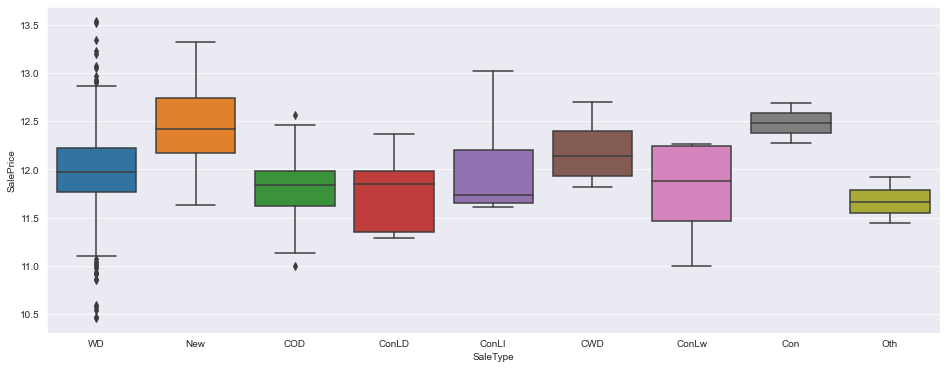

In [37]:
# Plotting the outliers of the attributes in relation with the target variable.

for i in cat_features.columns:
    plt.figure(figsize=(16,6))
    sns.boxplot(cat_features[i],  y = df_house['SalePrice'], data = df_house)

###### Converting the categorical data into numerical

In [24]:
cat_features = df_house.select_dtypes(exclude = [np.number])

In [25]:
cat_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [26]:
len(cat_features.columns)

43

In [27]:
# Converting the categorical data into numeric by creating dummies.

cat_dummie_col = pd.get_dummies(cat_features,drop_first=True)
cat_dummie_col

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0               0            0            1            0            1   
1               0            0            1            0            1   
2               0            0            1            0            1   
3               0            0            1            0            1   
4               0            0            1            0            1   
...           ...          ...          ...          ...          ...   
1455            0            0            1            0            1   
1456            0            0            1            0            1   
1457            0            0            1            0            1   
1458            0            0            1            0            1   
1459            0            0            1            0            1   

      Alley_No Alley  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0                  1           0             0             0             1   
1                  1           0             0             0             1   
2                  1           0             0             0             0   
3                  1           0             0             0             0   
4                  1           0             0             0             0   
...              ...         ...           ...           ...           ...   
1455               1           0             0             0             1   
1456               1           0             0             0             1   
1457               1           0             0             0             1   
1458               1           0             0             0             1   
1459               1           0             0             0             1   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                   0                0                1                 0   
1                   0                0                1                 0   
2                   0                0                1                 0   
3                   0                0                1                 0   
4                   0                0                1                 0   
...               ...              ...              ...               ...   
1455                0                0                1                 0   
1456                0                0                1                 0   
1457                0                0                1                 0   
1458                0                0                1                 0   
1459                0                0                1                 0   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                     0              0              0                 1   
1                     0              1              0                 0   
2                     0              0              0                 1   
3                     0              0              0                 0   
4                     0              1              0                 0   
...                 ...            ...            ...               ...   
1455                  0              0              0                 1   
1456                  0              0              0                 1   
1457                  0              0              0                 1   
1458                  0              0              0                 1   
1459                  0              0              0                 1   

      LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0                 0              0                     0                    0   
1                 0              0                     0                    0   
2                 0              0                     0                    0   
3                 0              0        

In [28]:
df_house.drop(list(cat_features.columns), axis=1, inplace=True)

In [29]:
df_house.shape

(1460, 37)

In [30]:
# Let's now concat the dummie variables with numerical data and the skewed treated data..

df_house = pd.concat([df_house, cat_dummie_col], axis = 1)
df_house

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0             60     4.174387  9.041922            7            5       2003   
1             20     4.382027  9.169518            6            8       1976   
2             60     4.219508  9.328123            7            5       2001   
3             70     4.094345  9.164296            7            5       1915   
4             60     4.430817  9.565214            8            5       2000   
...          ...          ...       ...          ...          ...        ...   
1455          60     4.127134  8.976768            6            5       1999   
1456          20     4.442651  9.486076            6            6       1978   
1457          70     4.189655  9.109636            7            9       1941   
1458          20     4.219508  9.181632            5            6       1950   
1459          20     4.317488  9.204020            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             2003       196.0         706           0        150   
1             1976         0.0         978           0        284   
2             2002       162.0         486           0        434   
3             1970         0.0         216           0        540   
4             2000       350.0         655           0        490   
...            ...         ...         ...         ...        ...   
1455          2000         0.0           0           0        953   
1456          1988       119.0         790         163        589   
1457          2006         0.0         275           0        877   
1458          1996         0.0          49        1029          0   
1459          1965         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856  6.752270       854             0   7.444249             1   
1            1262  7.140453         0             0   7.140453             0   
2             920  6.824374       866             0   7.487734             1   
3             756  6.867974       756             0   7.448334             1   
4            1145  7.043160      1053             0   7.695303             1   
...           ...       ...       ...           ...        ...           ...   
1455          953  6.859615       694             0   7.406711             0   
1456         1542  7.636752         0             0   7.636752             1   
1457         1152  7.080026      1152             0   7.757906             0   
1458         1078  6.982863         0             0   6.982863             1   
1459         1256  7.135687         0             0   7.135687             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4                9           1       2000.0           3    

While removing outliers via z-score being z>3, the columns remaing were only 75. So, outliers were not handled in this dataset.

###### SEPERATING THE INPUT AND OUTPUT VARIABLES

In [31]:
# Let's Separate the input and target variables

X = df_house.drop(columns=["SalePrice"])
y = df_house["SalePrice"]

In [32]:
X.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0          60     4.174387  9.041922            7            5       2003   
1          20     4.382027  9.169518            6            8       1976   
2          60     4.219508  9.328123            7            5       2001   
3          70     4.094345  9.164296            7            5       1915   
4          60     4.430817  9.565214            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.752270       854             0   7.444249             1             0   
1  7.140453         0             0   7.140453             0             1   
2  6.824374       866             0   7.487734             1             0   
3  6.867974       756             0   7.448334             1             0   
4  7.043160      1053             0   7.695303             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_No Alley  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0               1           0             0             0             1   
1               1           0             0             0             1   
2               1           0             0             0             0   
3               1           0             0             0             0   
4               1           0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4

In [33]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [34]:
# Let's check the shape of input and outpuut variables.

print(X.shape)
print(y.shape)

(1460, 259)
(1460,)


###### SCALING THE INPUT VARIABLES

In [35]:
# Scaling the Input variables

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.07337496, -0.07586857, -0.13323102, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276,  0.57242366,  0.11344181, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.07337496,  0.06500658,  0.42006074, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 0.30985939, -0.02820043, -0.00232484, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276,  0.06500658,  0.13686055, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276,  0.3709213 ,  0.180142  , ..., -0.11785113,
         0.4676514 , -0.30599503]])

###### Training and Testing different algorithms

In [36]:
# Importing the neccesary sklearn libraries.

from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xg 
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint

In [37]:
# Splitting the training and testing data and finding the maximum r2 score at random state.

def max_r2_score (reg, X, y):
    final_r_state=0
    max_r_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        r2_scr = r2_score(y_test, pred)
        if r2_scr > max_r_scr:
            max_r_scr = r2_scr
            final_r_state = r_state
            
    print("Maximum r2 score :", max_r_scr, "achieved at", final_r_state)
    print('\n')
    print("Mean Absolute Error : ",np.sqrt(mean_absolute_error(y_test, pred)))
    print('\n')
    print("RMSE : ",np.sqrt(mean_squared_error(y_test, pred)))

In [38]:
# Creating the instances for the algorithms.

lr = LinearRegression()
rg = Ridge()
las = Lasso()
sv = SVR()
dtr = DecisionTreeRegressor()
knnr = KNeighborsRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
abr = AdaBoostRegressor()
xgb = xg.XGBRFRegressor()
lgbm = lgb.LGBMRegressor()

In [39]:
models = []
models.append(('LinearRegression', lr))
models.append(('Ridge', rg))
models.append(('Lasso', las))
models.append(('SVR', sv))
models.append(('DecisionTreeRegressor', dtr))
models.append(('KNeighborsRegressor', knnr))
models.append(('RandomForestRegressor', rfr))
models.append(('GradientBoostingRegressor', gbr))
models.append(('AdaBoostRegressor', abr))
models.append(('XGBRFRegressor', xgb))
models.append(('LGBMRegressor', lgbm))

In [41]:
# CReating a list which holds the algorithms.

model = []
cvs = []

for name,model in models:
    k=model
    print('--------',name,'--------')
    r_state = max_r2_score(k, X, y)
    print('\n')
    mR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").mean()
    print('Cross validation score (Mean r2 score):', mR2)
    stdR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").std()
    print('Standard Deviationin r2 score :', stdR2)
    print('\n')
    print('\n')

-------- LinearRegression --------
Maximum r2 score : 0 achieved at 0


Mean Absolute Error :  24171376.56655499


RMSE :  3645211133670520.5


Cross validation score (Mean r2 score): -4.101533881622445e+21
Standard Deviationin r2 score : 7.1371307728807e+21




-------- Ridge --------
Maximum r2 score : 0.911080124811867 achieved at 45


Mean Absolute Error :  147.61961351169157


RMSE :  53760.52430993863


Cross validation score (Mean r2 score): 0.7396591231300207
Standard Deviationin r2 score : 0.14008211632502643




-------- Lasso --------
Maximum r2 score : 0.9108103077775548 achieved at 45


Mean Absolute Error :  145.23415703457803


RMSE :  47923.19837579281


Cross validation score (Mean r2 score): 0.7107750585550172
Standard Deviationin r2 score : 0.18847393013872232




-------- SVR --------
Maximum r2 score : 0 achieved at 0


Mean Absolute Error :  236.11892106281707


RMSE :  82828.9660150513


Cross validation score (Mean r2 score): -0.051355666293189106
Standard Devia

[ 24  78 180  98  72 100  89  96 164  11 111 217 151  96   1 268  20   4
  13   5  22   4  46  27  55  29 157  58 128  16   3  10   0   1  66  41
   1   0  13   8   0   0   0   0   0  12   2   2   5   0   3   5   0   8
   2   0   0   0   7   5   0  18   7   0   0   0   7   2   0   1  31   2
   2   0   6   0  15   0   0   0   0  16   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   2   0   0   0   7   0   0   1   0   4   7   0
   2   0   0   0   0   0   0   0   0   0   0   0   9   0   1   2   0   1
   0   0   1   3   8   0   0   0   0   0   0   1   0   3   0   1   0   1
   0   3   2  15   0   6   0   4   2   1   1   0   9   5   2   0   0   0
   0  14   0   4   3   0   0   7  17   0  11   0   1  12   1   0   5   0
   2   0   0   0   0   1   6   0   0   0   0   0   0   0  15  10   0   0
   0   7   1  13   5   0   0   0   0   0  12   0  12   0   0   5  13   0
   1   0  10   0   0  14   8   0   0   0   0   4   0   0   0   0   1   2
   3   0   0   0   1   0   0   3   0   0   0   0   

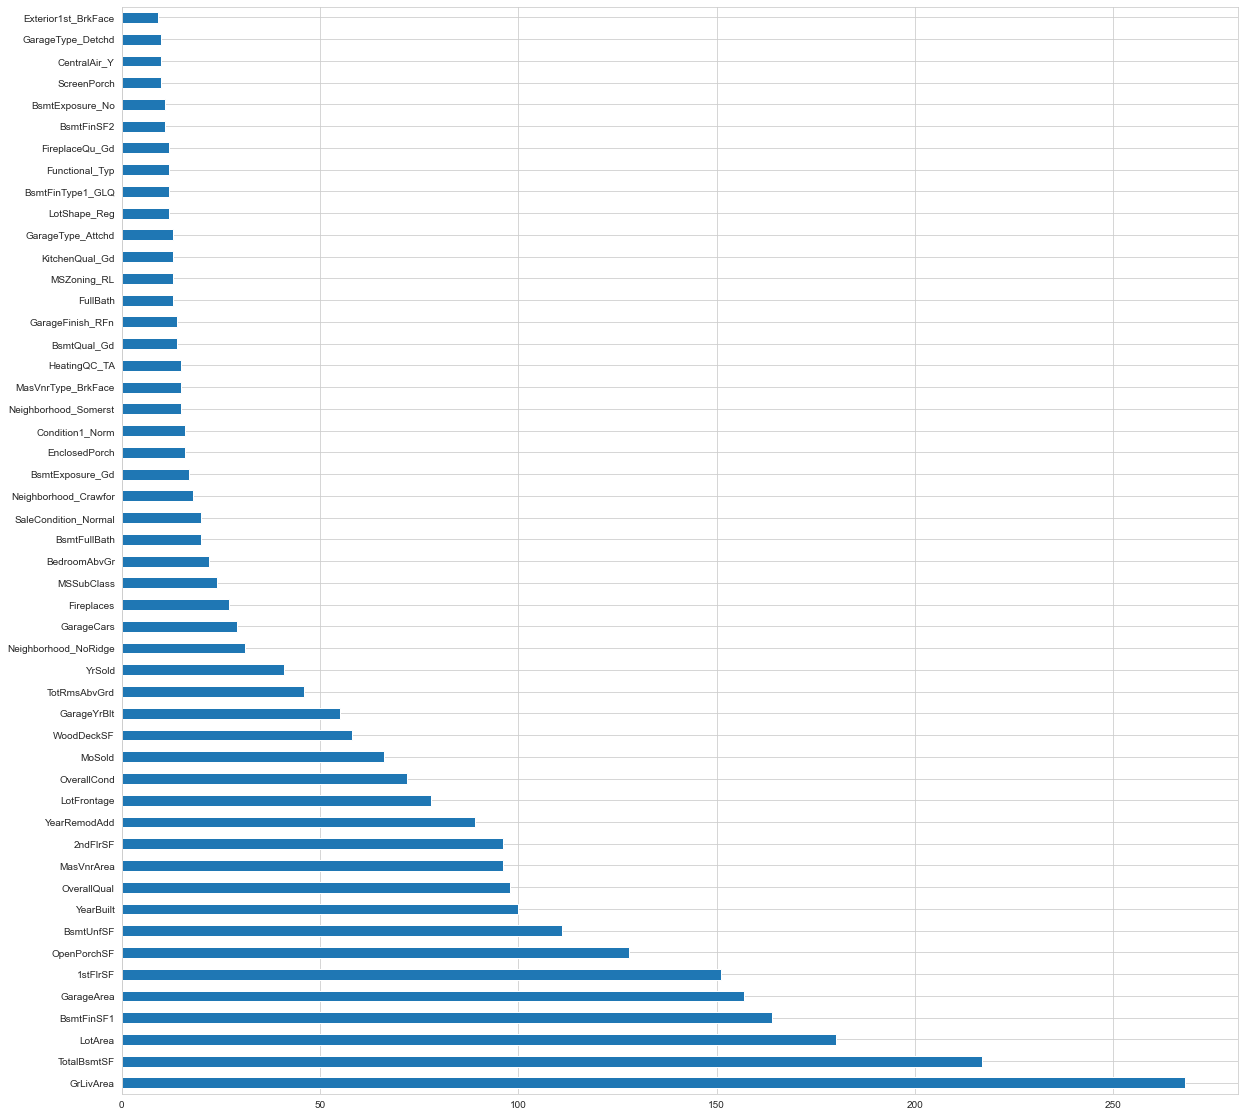

In [42]:
# Plotting the feature importace or the important features to this dataset.
gbr.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers


# plot graph of feature importances for better visualization
plt.figure(figsize=(20,20))
feat_importances = pd.Series(model.feature_importances_, index = df_house.drop(columns=["SalePrice"]).columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [42]:
# Applying ensemble technique to the selected models and thus, getting the best r2 score for these models when ensembled.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 92)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

rg.fit(X_train, y_train)
rg_pred = rg.predict(X_test)

pred_mean = np.mean([rfr_pred, gbr_pred, rg_pred], axis = 0)
r2_scr_ensemble = r2_score(y_test, pred_mean)
print("Maximum r2 score :", r2_scr_ensemble)
print('\n')
print("Mean Absolute Error : ", np.sqrt(mean_absolute_error(y_test, pred_mean)))
print('\n')
print("RMSE : ", np.sqrt(mean_squared_error(y_test, pred_mean)))

Maximum r2 score : 0.9320494330614896


Mean Absolute Error :  111.67441519954862


RMSE :  18009.348557876212


###### Hyperparameter tuning of some selected models Using RandomizedSearchCV

In [77]:
# Finding the best alpha value for Ridge regression using RandomizedSearchCV.

rg = Ridge()
parameters = {"alpha":np.arange(0, 1, 0.01)}
rg_Random = RandomizedSearchCV(rg, parameters)
rg_Random.fit(X, y)
print(rg_Random.best_params_)
print(rg_Random.best_score_)

{'alpha': 0.98}
0.8301902145899595


In [70]:
# Finding the best parameters for Random Forest Regressor using RandomizedSearchCV.

# Creating the hyperparameter grid  
param_rfr = { 
              'n_estimators' : [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth': [int(x) for x in np.linspace(10, 100, num = 10)],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf' : [1, 2, 4],
            'bootstrap' : [True, False]
            }

  
# Instantiating RandomizedSearchCV object 
rfr_Random = RandomizedSearchCV(rfr, param_rfr, cv = 3, verbose=0, n_jobs=-1) 
  
# Fitting the model for learning    
rfr_Random.fit(X, y) 
  
# Print the tuned parameters and score 
print("Tuned Parameters: {}".format(rfr_Random.best_params_)) 
print("Best score is {}".format(rfr_Random.best_score_)) 

Tuned Parameters: {'n_estimators': 654, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Best score is 0.8623200983387234


In [67]:
# Finding the best parameters for Gradient Boosting Regressor using RandomizedSearchCV.

# Creating the hyperparameter grid  
param_gbr = { 
              'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
              'n_estimators' : [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth': [int(x) for x in np.linspace(10, 100, num = 10)],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf' : [1, 2, 4],
            }

  
# Instantiating RandomizedSearchCV object 
gbr_Random = RandomizedSearchCV(gbr, param_gbr, cv = 3, verbose=0, n_jobs=-1) 
  
# Fitting the model for learning    
gbr_Random.fit(X, y) 
  
# Print the tuned parameters and score 
print("Tuned Parameters: {}".format(gbr_Random.best_params_)) 
print("Best score is {}".format(gbr_Random.best_score_)) 

Tuned Parameters: {'n_estimators': 763, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80, 'learning_rate': 0.1}
Best score is 0.8794419736999748


In [71]:
# Finding the best parameters for XGBoost Regressor using RandomizedSearchCV.

# Creating the hyperparameter grid  
param_xgb = {
    'min_child_weight':[4,5], 
    'gamma':[i/10.0 for i in range(3,6)], 
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)], 
    'max_depth': [2,3,4]
}

  
# Instantiating RandomizedSearchCV object 
xgb_Random = RandomizedSearchCV(xgb, param_xgb, cv = 3, verbose=0, n_jobs=-1) 
  
# Fitting the model for learning    
xgb_Random.fit(X, y) 
  
# Print the tuned parameters and score 
print("Tuned Parameters: {}".format(xgb_Random.best_params_)) 
print("Best score is {}".format(xgb_Random.best_score_)) 

Tuned Parameters: {'subsample': 0.6, 'min_child_weight': 5, 'max_depth': 4, 'gamma': 0.4, 'colsample_bytree': 0.8}
Best score is 0.8174020292566238


In [43]:
# Creating the instances after getting the best parameters for getting the results of the respective models after hypertuning.

# Ridge Regression
rg_random_tuned = Ridge(alpha = 0.98)

# RandomForest Regressor
rfr_random_tuned = RandomForestRegressor(n_estimators = 654, 
                                  min_samples_split = 2, 
                                  min_samples_leaf = 4, 
                                  max_features = 'auto', 
                                  max_depth = 10, 
                                  bootstrap = True)

# GradientBoosting Regressor
gbr_random_tuned = GradientBoostingRegressor(n_estimators = 763, 
                                      min_samples_split = 2, 
                                      min_samples_leaf = 4, 
                                      max_features = 'sqrt', 
                                      max_depth = 80, 
                                      learning_rate = 0.1)

# XGBoost Regressor
xgb_random_tuned = xg.XGBRFRegressor(subsample = 0.6,
                            min_child_weight = 5, 
                           max_depth = 4, 
                           gamma = 0.4, 
                           colsample_bytree = 0.8)

In [44]:
tuned_models = []
tuned_models.append(('Ridge', rg_random_tuned))
tuned_models.append(('RandomForestRegressor', rfr_random_tuned))
tuned_models.append(('GradientBoostingRegressor', gbr_random_tuned))
tuned_models.append(('XGBRFRegressor', xgb_random_tuned))

In [64]:
# CReating a list which holds the algorithms.

model = []
cvs = []

for name,model in tuned_models:
    k = model
    print('--------',name,'--------')
    r_state = max_r2_score(k, X, y)
    print('\n')
    mR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").mean()
    print('Cross validation score (Mean r2 score):', mR2)
    stdR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").std()
    print('Standard Deviationin r2 score :', stdR2)
    print('\n')
    print('\n')

-------- Ridge --------
Maximum r2 score : 0.9110743452871467 achieved at 45


Mean Absolute Error :  147.57900088793602


RMSE :  53617.65102580564


Cross validation score (Mean r2 score): 0.7392122821529423
Standard Deviationin r2 score : 0.14081049749158234




-------- RandomForestRegressor --------
Maximum r2 score : 0.9066791214219059 achieved at 92


Mean Absolute Error :  132.67264893896802


RMSE :  27651.100129637874


Cross validation score (Mean r2 score): 0.846772941297455
Standard Deviationin r2 score : 0.03139134082715841




-------- GradientBoostingRegressor --------
Maximum r2 score : 0.9201647792745667 achieved at 95


Mean Absolute Error :  129.2481963268767


RMSE :  27807.440486968102


Cross validation score (Mean r2 score): 0.8674296401300641
Standard Deviationin r2 score : 0.02812961682624922




-------- XGBRFRegressor --------
Maximum r2 score : 0.869343545595223 achieved at 93


Mean Absolute Error :  146.7966796973374


RMSE :  32689.207145565968


Cross v

In [59]:
# Applying ensemble technique to the selected models and thus, getting the best r2 score for these models when ensembled.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 95)
rfr_random_tuned.fit(X_train, y_train)
rfr_pred = rfr_random_tuned.predict(X_test)

gbr_random_tuned.fit(X_train, y_train)
gbr_pred = gbr_random_tuned.predict(X_test)

rg_random_tuned.fit(X_train, y_train)
rg_pred = rg_random_tuned.predict(X_test)

xgb_random_tuned.fit(X_train, y_train)
xgb_pred = xgb_random_tuned.predict(X_test)

pred_mean = np.mean([rfr_pred, gbr_pred, rg_pred, xgb_pred], axis = 0)
r2_scr_ensemble = r2_score(y_test, pred_mean)
print("Maximum r2 score :", r2_scr_ensemble)
print('\n')
print("Mean Absolute Error : ", np.sqrt(mean_absolute_error(y_test, pred_mean)))
print('\n')
print("RMSE : ", np.sqrt(mean_squared_error(y_test, pred_mean)))

Maximum r2 score : 0.913517831864368


Mean Absolute Error :  123.42801729293657


RMSE :  23229.004636885795


###### Hyperparameter tuning of some selected models Using GridSearchCV

In [84]:
# Finding the best alpha value for Ridge regression using GridSearchCV.

rg = Ridge()
parameters = {"alpha":np.arange(0, 1, 0.01)}
rg_grid = GridSearchCV(rg, parameters)
rg_grid.fit(X, y)
print(rg_grid.best_params_)
print(rg_grid.best_score_)

{'alpha': 0.99}
0.8303069994832704


In [48]:
# Finding the best parameters for Random Forest Regressor using GridSearchCV.

# Creating the hyperparameter grid  
param_rfr = { 
              'n_estimators' : [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth': [int(x) for x in np.linspace(10, 100, num = 10)],
            'bootstrap' : [True, False]
            }

  
# Instantiating GridSearchCV object 
rfr_grid = GridSearchCV(rfr, param_rfr, cv = 3, verbose=0, n_jobs=-1) 
  
# Fitting the model for learning    
rfr_grid.fit(X, y) 
  
# Print the tuned parameters and score 
print("Tuned Parameters: {}".format(rfr_grid.best_params_)) 
print("Best score is {}".format(rfr_grid.best_score_)) 

Tuned Parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 790}
Best score is 0.8725721260883116


In [58]:
# Finding the best parameters for Gradient Boosting Regressor using GridSearchCV.

# Creating the hyperparameter grid  
param_gbr = { 
              'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
              'n_estimators' : [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth': [int(x) for x in np.linspace(10, 100, num = 10)]
            }

  
# Instantiating GridSearchCV object 
gbr_grid = GridSearchCV(gbr, param_gbr, cv = 3, verbose=0, n_jobs=-1) 
  
# Fitting the model for learning    
gbr_grid.fit(X, y) 
  
# Print the tuned parameters and score 
print("Tuned Parameters: {}".format(gbr_grid.best_params_)) 
print("Best score is {}".format(gbr_grid.best_score_)) 

Tuned Parameters: {'n_estimators': 680, 'max_features': 'sqrt', 'max_depth': 40, 'learning_rate': 0.05}
Best score is 0.8958621973699974


In [52]:
# Finding the best parameters for XGBoost Regressor using GridSearchCV.

# Creating the hyperparameter grid  
param_xgb = {
    'min_child_weight':[4,5], 
    'gamma':[i/10.0 for i in range(3,6)], 
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)], 
    'max_depth': [2,3,4]
}

  
# Instantiating GridSearchCV object 
xgb_grid = GridSearchCV(xgb, param_xgb, cv = 3, verbose=0, n_jobs=-1) 
  
# Fitting the model for learning    
xgb_grid.fit(X, y) 
  
# Print the tuned parameters and score 
print("Tuned Parameters: {}".format(xgb_grid.best_params_)) 
print("Best score is {}".format(xgb_grid.best_score_))

Tuned Parameters: {'subsample': 0.7, 'min_child_weight': 5, 'max_depth': 4, 'gamma': 0.5, 'colsample_bytree': 0.8}
Best score is 0.8352620292566238


In [60]:
# # Creating the instances after getting the best parameters for getting the results of the respective models after hypertuning.

# Ridge Regression
rg_grid_tuned = Ridge(alpha = 0.99)

# RandomForest Regressor
rfr_grid_tuned = RandomForestRegressor(n_estimators = 790,
                                  max_features = 'sqrt', 
                                  max_depth = 50, 
                                  bootstrap = False)

# GradientBoosting Regressor
gbr_grid_tuned = GradientBoostingRegressor(n_estimators = 680, 
                                      max_features = 'sqrt', 
                                      max_depth = 40, 
                                      learning_rate = 0.05)

# XGBoost Regressor
xgb_grid_tuned = xg.XGBRFRegressor(subsample = 0.7,
                            min_child_weight = 5, 
                           max_depth = 4, 
                           gamma = 0.5, 
                           colsample_bytree = 0.8)

In [63]:
hyper_models = []
hyper_models.append(('Ridge', rg_grid_tuned))
hyper_models.append(('RandomForestRegressor', rfr_grid_tuned))
hyper_models.append(('GradientBoostingRegressor', gbr_grid_tuned))
hyper_models.append(('XGBRFRegressor', xgb_grid_tuned))

In [64]:
# CReating a list which holds the algorithms.

model = []
cvs = []

for name,model in hyper_models:
    k = model
    print('--------',name,'--------')
    r_state = max_r2_score(k, X, y)
    print('\n')
    mR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").mean()
    print('Cross validation score (Mean r2 score):', mR2)
    stdR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").std()
    print('Standard Deviationin r2 score :', stdR2)
    print('\n')
    print('\n')

-------- Ridge --------
Maximum r2 score : 0.9110772815351381 achieved at 45


Mean Absolute Error :  147.5995033313784


RMSE :  53689.60142308864


Cross validation score (Mean r2 score): 0.7394363776261443
Standard Deviationin r2 score : 0.14044521232484256




-------- RandomForestRegressor --------
Maximum r2 score : 0.9122862976632449 achieved at 80


Mean Absolute Error :  130.69138322612486


RMSE :  28651.70795954642


Cross validation score (Mean r2 score): 0.8649499593228619
Standard Deviationin r2 score : 0.022188223946458932




-------- GradientBoostingRegressor --------
Maximum r2 score : 0.909731823861059 achieved at 95


Mean Absolute Error :  133.75725586734873


RMSE :  29602.386751737115


Cross validation score (Mean r2 score): 0.8651319922260783
Standard Deviationin r2 score : 0.03297766799795824




-------- XGBRFRegressor --------
Maximum r2 score : 0.8712833521467533 achieved at 63


Mean Absolute Error :  146.297663392866


RMSE :  32558.566469709633


Cross v

In [65]:
# Applying ensemble technique to the selected models and thus, getting the best r2 score for these models when ensembled.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 95)
rfr_grid_tuned.fit(X_train, y_train)
rfr_pred = rfr_grid_tuned.predict(X_test)

gbr_grid_tuned.fit(X_train, y_train)
gbr_pred = gbr_grid_tuned.predict(X_test)

rg_grid_tuned.fit(X_train, y_train)
rg_pred = rg_grid_tuned.predict(X_test)

xgb_grid_tuned.fit(X_train, y_train)
xgb_pred = xgb_grid_tuned.predict(X_test)

pred_mean = np.mean([rfr_pred, gbr_pred, rg_pred, xgb_pred], axis = 0)
r2_scr_ensemble = r2_score(y_test, pred_mean)
print("Maximum r2 score :", r2_scr_ensemble)
print('\n')
print("Mean Absolute Error : ", np.sqrt(mean_absolute_error(y_test, pred_mean)))
print('\n')
print("RMSE : ", np.sqrt(mean_squared_error(y_test, pred_mean)))

Maximum r2 score : 0.913131411035128


Mean Absolute Error :  122.99850705629142


RMSE :  23280.842876507097


The ensembling of base model is giving the best results with r2 score 93%. This, technique actually helps the model to improve more and thus perform better in order to achieve the respective goal.



In [72]:
# saving the model using joblib
import joblib

# Save the model as a pickle in a file
joblib.dump(gbr, 'house_price.pkl')

['house_price.pkl']